<a href="https://colab.research.google.com/github/Apaulgithub/Hotel_Booking_Analysis_EDA_Project/blob/EDA-Project/Capstone_Project_1_Hotel_Booking_Analysis_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Student Name -**Mazen Asag


# **Project Summary -**

**Data Exploration and Preprocessing:**

* **Dataset Overview**: In this project, we explored a dataset containing hotel bookings, which comprises two types of hotels: **City Hotel** and **Resort Hotel**.

* **Dataset Shape**: The dataset contains **119,390 rows** and **32 columns**, providing a comprehensive view of hotel bookings.

* **Data Types**: The columns in the dataset are categorized into three data types: **Object**, **float64**, and **int64**.

* **Handling Missing and Duplicate Values**: The dataset contains both **duplicates** and **missing values**. We addressed these issues by replacing null values and dropping duplicate rows to ensure data integrity.

* **Columns with Missing Values**: The **'Company'** column has the highest number of missing values, followed by the **'Agent'**, **'Country'**, and **'Children'** columns. Notably, the **'Children'** column has only 4 null values, whereas the **'Company'** column has a substantial **112,593 null values**.

**Data Manipulation Workflow:**

* **Workflow Categories**: The data manipulation workflow is divided into three main stages:
    - **Data Collection**
    - **Data Cleaning & Manipulation**
    - **Exploratory Data Analysis (EDA)**

* **Data Collection**: To begin, we utilized various methods like `head()`, `tail()`, `info()`, `describe()`, and `columns()` to explore the dataset and gather essential information about the columns and their structure.

* **Unique Value Analysis**: We further explored the dataset by checking the **number of unique values** for each column and created a list of these unique values.

* **Data Type Conversion**: During this process, we identified and converted columns to appropriate data types. Additionally, we created two new columns: **'total_people'** and **'total_stay'** to represent aggregated information.

* **Data Cleaning**: Some columns were found to have incorrect data types, which were corrected during the cleaning phase. Moreover, **duplicate rows** (31994 duplicates) were identified and removed.

* **Handling Zero-Guest Rows**: We identified rows where the combined values of **adults**, **babies**, and **children** were all zero, which indicated no bookings. These rows were removed from the dataset as they did not represent valid bookings.

* **Date Column Correction**: The **'reservation_status_date'** column, initially in object format, was converted to a **date** type for better usability in further analysis.

**Data Wrangling and Preprocessing:**

* **Null Value Handling**: Before moving to visualization, I checked for null values across all columns. Columns with minimal null values were filled using the `fillna()` method to maintain dataset completeness.

* **Data Visualization Preparation**: With the data wrangling phase complete, I proceeded to visualize the data to uncover meaningful insights.

**Data Visualization and Insights:**

* **Visualization for Business Insights**: Using a variety of charts, I visualized key data points to understand and interpret the trends. These visual insights were critical for deriving business outcomes that can significantly impact decision-making and help drive growth.

* **Exploration and Analysis**: Through in-depth exploration and analysis, I identified critical factors that influence hotel bookings, providing valuable insights for enhancing business performance.


# **Problem Statement**


**Have You Ever Wondered...**

- **When the best time of year to book a hotel room is?**
- **What the optimal length of stay is to get the best daily rate?**
- **How likely a hotel is to receive a disproportionately high number of special requests?**

This **hotel booking dataset** can help you answer these questions!

**Dataset Overview:**

The dataset contains detailed booking information for both **city hotels** and **resort hotels**. It includes essential data such as:

- **Booking dates**
- **Length of stay**
- **Number of guests** (adults, children, and babies)
- **Available parking spaces**
- **Special requests**, and more

Importantly, all **personally identifying information** has been removed to ensure privacy and focus on the business-related data.

**Explore and Analyze the Data:**

By diving into this dataset, you can **explore and analyze** various factors that influence hotel bookings. Some key aspects to explore include:

- Seasonal trends in hotel bookings
- The relationship between **length of stay** and **daily rates**
- The impact of **special requests** on booking outcomes
- Insights into **guest preferences** and how they influence hotel operations

This dataset provides a great opportunity to uncover valuable insights that can help hotels optimize pricing, marketing strategies, and overall guest experience.


#### **Define Your Business Objective?**

## Objectives

The primary goal of this analysis is to:

- Identify key factors that affect the booking decisions for both **City Hotel** and **Resort Hotel**.
- Understand the trends and patterns in guest preferences, booking times, stay lengths, and other features.
- Draw actionable insights that can help in **improving hotel strategies**, including pricing, marketing, and customer experience.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

### Dataset Loading

In [2]:
df = pd.read_csv('/content/Hotel Bookings.csv')

### Dataset First View

In [3]:
# Dataset First Look
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])

Number of rows 119390
Number of columns 32


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

# Thus, this dataset contains 31994 duplicate values

31994

<ipython-input-7-08758edb7be2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.duplicated(), palette='Set2')


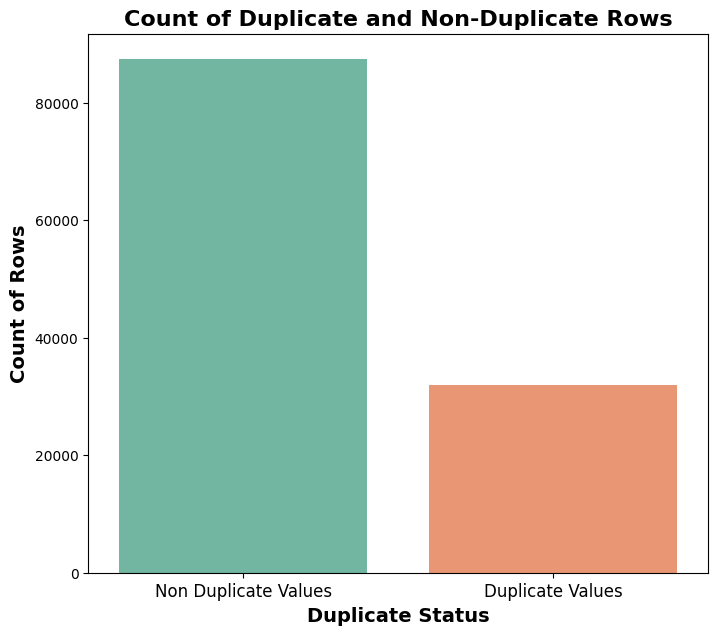

In [7]:

# Set the plot size
plt.figure(figsize=(8, 7))

# Create the countplot for duplicated rows
sns.countplot(x=df.duplicated(), palette='Set2')

# Set x-axis labels with better font size and formatting
plt.xticks([0, 1], ["Non Duplicate Values", "Duplicate Values"], fontsize=12)

# Set labels and title with improved font sizes
plt.xlabel('Duplicate Status', fontsize=14, fontweight='bold')
plt.ylabel('Count of Rows', fontsize=14, fontweight='bold')
plt.title('Count of Duplicate and Non-Duplicate Rows', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# Checking Missing Values/Null Values Count in individual columns
df.isnull().sum().sort_values(ascending=False)

# Getting missing Values/Null Values Count in descending order to get a organized output

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_week_number               0
arrival_date_month                     0
arrival_date_year                      0
lead_time                              0
reservation_status_date                0
dtype: int64

<Figure size 1500x1100 with 0 Axes>

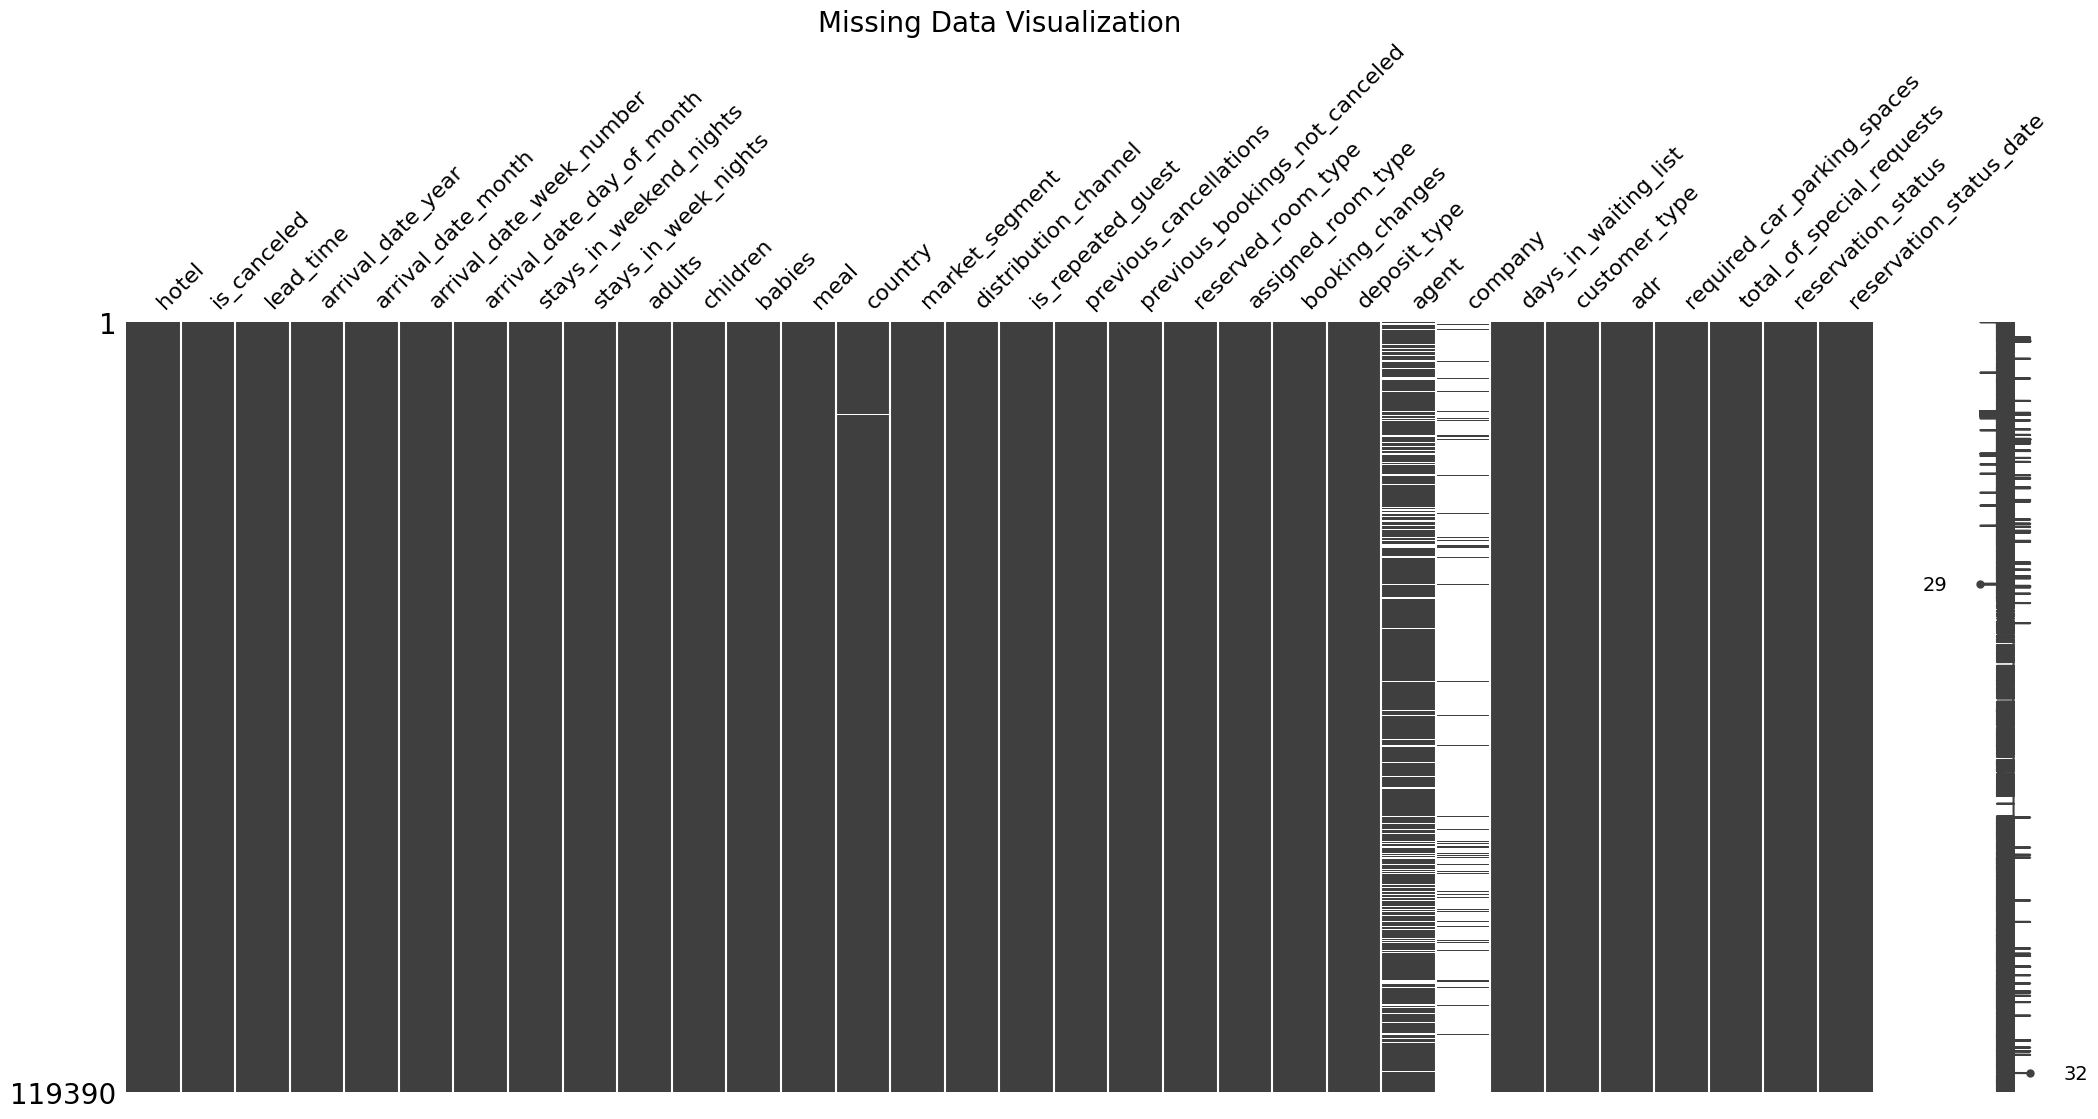

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(15, 11))

# Create the missing values matrix plot
msno.matrix(df)

# Set the title
plt.title('Missing Data Visualization', fontsize=20)

# To show the plot
plt.show()


### What did you know about your dataset?


*   This data set contains a single file which compares various booking information between two hotels: City Hotel and Resort Hotel. Includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

*   The dataset contains a total of 119390 rows and 32 columns.

*   All the columns are divided into three dtypes : Object, float64 and int64.

*   This dataset does have duplicated values as well as null values. There are total of 31994 duplicate values and four columns have missing values/ null values.

*   The maximum number of missing values are from 'Company' column then followed by 'Agent', 'Country' and 'Children' columns. The 'Children' column consists of only 4 null values, while 'Company' column consists of 112593 null values.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

# Getting all the columns name of dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

# Describe data for insights

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

### Variables Description


1. **hotel :** Name of the hotel (Resort Hotel or City Hotel)

2. **is_canceled :** If the booking was canceled (1) or not (0)

3. **lead_time:** Number of days before the actual arrival of the guests

4. **arrival_date_year :** Year of arrival date

5. **arrival_date_month :** Month of arrival date

6. **arrival_date_week_number :** Week number of year for arrival date

7. **arrival_date_day_of_month :** Day of arrival date

8. **stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights :** Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. **adults :** Number of adults among guests

11. **children :** Number of children among guests

12. **babies :** Number of babies among guests

13. **meal :** Type of meal booked

14. **country :** Country of guests

15. **market_segment :** Designation of market segment

16. **distribution_channel :** Name of booking distribution channel

17. **is_repeated_guest :** If the booking was from a repeated guest (1) or not (0)

18. **previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type :** Code of room type reserved

21. **assigned_room_type :** Code of room type assigned

22. **booking_changes :** Number of changes/amendments made to the booking

23. **deposit_type :** Type of the deposit made by the guest

24. **agent :** ID of travel agent who made the booking

25. **company :** ID of the company that made the booking

26. **days_in_waiting_list :** Number of days the booking was in the waiting list

27. **customer_type :** Type of customer, assuming one of four categories

28. **adr :** Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces :** Number of car parking spaces required by the customer

30. **total_of_special_requests :** Number of special requests made by the customer

31. **reservation_status :** Reservation status (Canceled, Check-Out or No-Show)

32. **reservation_status_date :** Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [12]:
for i in df.columns.tolist():
  print(f"No. of {i} is {df[i].nunique()}")

No. of hotel is 2
No. of is_canceled is 2
No. of lead_time is 479
No. of arrival_date_year is 3
No. of arrival_date_month is 12
No. of arrival_date_week_number is 53
No. of arrival_date_day_of_month is 31
No. of stays_in_weekend_nights is 17
No. of stays_in_week_nights is 35
No. of adults is 14
No. of children is 5
No. of babies is 5
No. of meal is 5
No. of country is 177
No. of market_segment is 8
No. of distribution_channel is 5
No. of is_repeated_guest is 2
No. of previous_cancellations is 15
No. of previous_bookings_not_canceled is 73
No. of reserved_room_type is 10
No. of assigned_room_type is 12
No. of booking_changes is 21
No. of deposit_type is 3
No. of agent is 333
No. of company is 352
No. of days_in_waiting_list is 128
No. of customer_type is 4
No. of adr is 8879
No. of required_car_parking_spaces is 5
No. of total_of_special_requests is 6
No. of reservation_status is 3
No. of reservation_status_date is 926


In [13]:
# Checking Unique Values in categorical columns one by one
# Checking Unique Values in Hotel column
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
# Checking Unique Values in is_canceled column
df['is_canceled'].unique()

array([0, 1])

In [15]:
# Checking Unique Values in lead_time column
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [16]:
# Checking Unique Values in arrival_date_year column
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [17]:
# Checking Unique Values in arrival_date_week_number column
df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [18]:
# Checking Unique Values in arrival_date_day_of_month column
df['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [19]:
# Checking Unique Values in stays_in_weekend_nights column
df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [20]:
# Checking Unique Values in stays_in_week_nights column
df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [21]:
# Checking Unique Values in adults column
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [22]:
# Checking Unique Values in children column
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [23]:
# Checking Unique Values in babies column
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [24]:
# Checking Unique Values in meal column
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [25]:
# Checking Unique Values in country column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [26]:
# Checking Unique Values in market_segment column
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [27]:
# Checking Unique Values in distribution_channel column
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [28]:
# Checking Unique Values in is_repeated_guest column
df['is_repeated_guest'].unique()

array([0, 1])

In [29]:
# Checking Unique Values in previous_cancellations column
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [30]:
# Checking Unique Values in previous_bookings_not_canceled column
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [31]:
# Checking Unique Values in reserved_room_type column
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [32]:
# Checking Unique Values in assigned_room_type column
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [33]:
# Checking Unique Values in booking_changes column
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [34]:
# Checking Unique Values in deposit_type column
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [35]:
# Checking Unique Values in agent column
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [36]:
# Checking Unique Values in company column
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [37]:
# Checking Unique Values in days_in_waiting_list column
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [38]:
# Checking Unique Values in customer_type column
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [39]:
# Checking Unique Values in adr column
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [40]:
# Checking Unique Values in required_car_parking_spaces column
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [41]:
# Checking Unique Values in total_of_special_requests column
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [42]:
# Checking Unique Values in reservation_status column
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [43]:
# Checking Unique Values in reservation_status_date column
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Write your code to make your dataset analysis ready.
# Missing Values/Null Values in Columns

df.isnull().sum().sort_values(ascending = False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [45]:
# Replacing null values of company, agent and children columns with 0 and country column with 'others'

df[['company','agent','children']] = df[['company','agent','children']].fillna(0)
df[['country']] = df[['country']].fillna('others')

In [46]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [47]:
# Checking number of duplicate values in the dataset
len(df[df.duplicated()])

# Thus, this dataset contains duplicate values

31994

In [48]:
# Dropping the duplicate rows from dataset
df = df.drop_duplicates()

In [49]:
# Checking the shape of dataset after dropping duplicate values
df.shape

(87396, 32)

In [50]:
# Checking the shape of dataset whose combining values of adults, babies and children columns is 0
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [51]:
# Dropping the rows where combining values of adults, babies and children columns is 0, because it simply means no bookings were made
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

<ipython-input-51-0d1ba619b36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)


### **Converting columns to appropriate datatypes**

In [52]:
# Changing datatype of column 'reservation_status_date' from object to data_type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

<ipython-input-52-86d03c534b5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')


### **Adding important columns as per requirement**

In [53]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people number as column, i.e. total types of person = num of adults + children + babies
df['total_people'] = df['adults']+df['babies']+df['children']

<ipython-input-53-85bfb19271ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
<ipython-input-53-85bfb19271ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_people'] = df['adults']+df['babies']+df['children']


In [54]:
# Checking the final number of rows and columns
df.shape

(87230, 34)

### What all manipulations have you done and insights you found?

I have done the following manipulations and the insights were found, are as follows:-


*   I found that there were four columns containing null values. So we had Null values in columns- Company, Agent, Country and Children.

  1.   For company and agent, i have filled the missing values with 0

  2.   For country column, i have fill missing values with object 'Others'(Assuming while collecting data country was not found so user selected the 'Others' option.)

  3.   As the count of missing values in Children Column was only 4, so it was replaced with 0 considering no children.


*   This dataset was also containing duplicate values, so duplicate values was dropped.

*   I found that there were some rows in which the combining values of adults, babies and childrens was 0, so this simply means there were no guests as 0 indicates presence of none. So, there were no bookings made. As a result, i simply dropped the rows where combining values of adults, babies and children columns was 0.

*   The data type of 'reservation_status_date' column was object type, so it was changed to date type format for better use.

*   There were two new columns that was added, one is 'total_people' and other is 'total_stay'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart for most preferred hotel (Univariate)

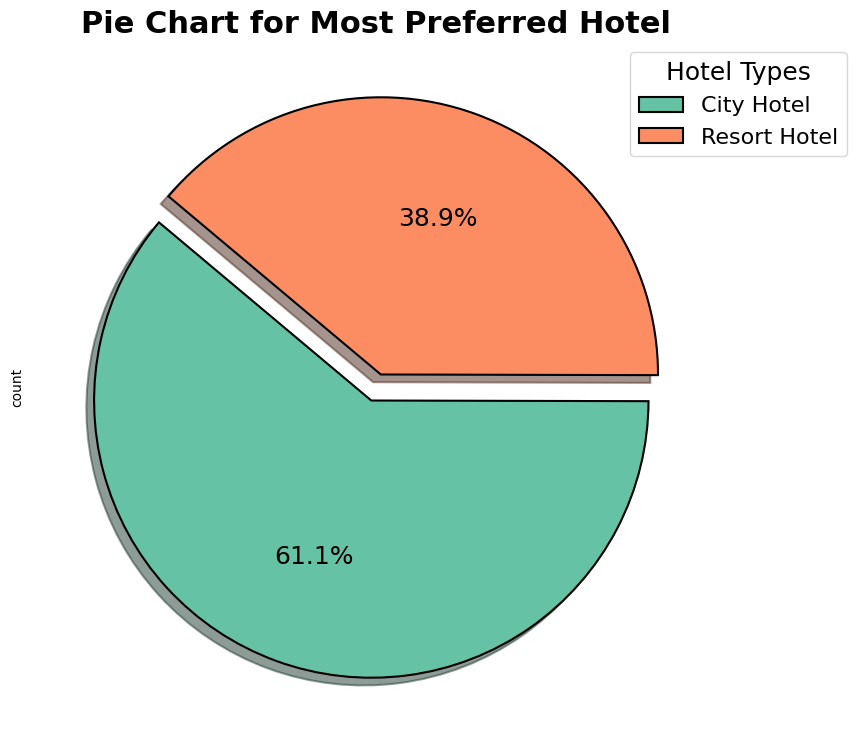

In [55]:

# Visualizing by pie chart
plt.figure(figsize=(10, 9))

# Create the pie chart with better styling
df['hotel'].value_counts().plot.pie(
    explode=[0.05, 0.05],  # Slightly explode each slice for better visibility
    autopct='%1.1f%%',      # Display percentage on the pie slices
    shadow=True,            # Add a shadow effect
    startangle=140,         # Start angle for better visual balance
    colors=sns.color_palette("Set2", n_colors=2),  # Using Set2 color palette for a clean look
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Black border around each slice
    fontsize=18,            # Set font size for percentages
    labels=None             # Do not display labels on the pie slices
)

# Set title with custom font size and bold text
plt.title('Pie Chart for Most Preferred Hotel', fontsize=22, fontweight='bold', family='Arial')

# Add the legend with custom position and font size
labels = ['City Hotel', 'Resort Hotel']  # Labels for the two categories in 'hotel'
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=16, title="Hotel Types", title_fontsize=18)

# To show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that City Hotel is most preferred hotel by the guests. Thus City Hotel has maximum bookings. 61.1% guests are preferred City Hotel, while only 38.9% guests have shown interest in Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, for both types of Hotels, this graph and data will make some positive business impacts.

City Hotel are doing well so they are providing more services to attract more guests to increase more revenue. But, in case of Resort Hotel, guests have shown less interest than City Hotel. So, Resort Hotel need to find solution to attract guests and find what City Hotel have done to attract guests. So, there is an scope of tremendous growth in Resort Hotel, if they upgrade their services and adopt the path of growth and success learning from the success strategies of City Hotels and adding new ideas of themselves.

#### Chart - 2 - Hotel type with highest adr (Bivariate with Categorical - Numerical)

<ipython-input-56-0388d437fa0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hotel', y='adr', data=highest_adr, palette="Blues_d", edgecolor='black', linewidth=1.5)
<ipython-input-56-0388d437fa0c>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize=16, fontweight='bold')


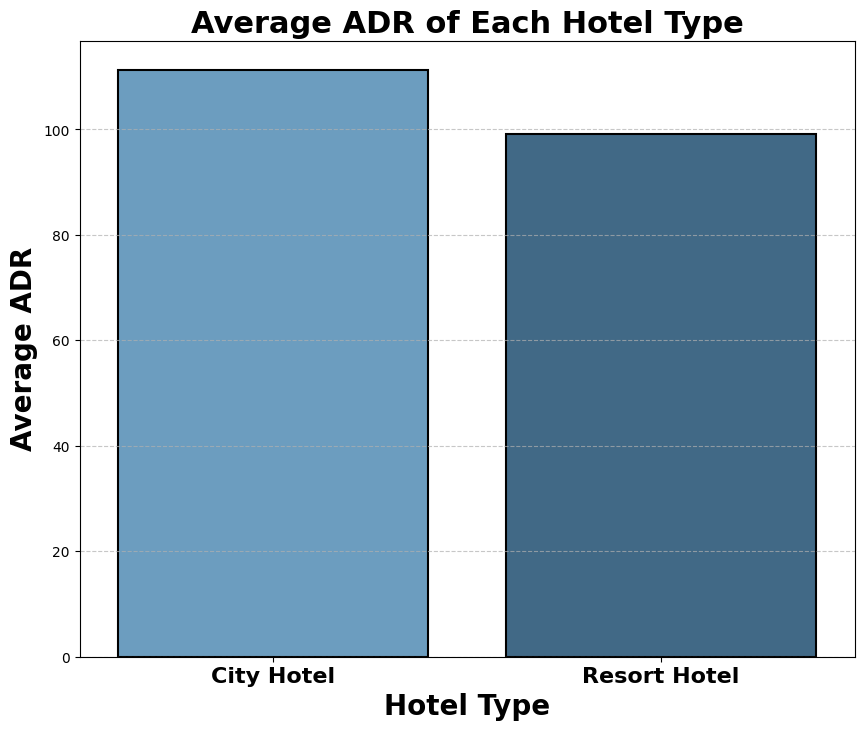

In [56]:


# Group by Hotel
group_by_hotel = df.groupby('hotel')

# Grouping by Hotel adr
highest_adr = group_by_hotel['adr'].mean().reset_index()

# Set plot size
plt.figure(figsize=(10, 8))

# Create the barplot with better styling
ax = sns.barplot(x='hotel', y='adr', data=highest_adr, palette="Blues_d", edgecolor='black', linewidth=1.5)

# Set labels and title with custom fonts
ax.set_xlabel("Hotel Type", fontsize=20, fontweight='bold', family='Arial')
ax.set_ylabel("Average ADR", fontsize=20, fontweight='bold', family='Arial')
ax.set_title("Average ADR of Each Hotel Type", fontsize=22, fontweight='bold', family='Arial')

# Set the x-axis tick labels and adjust the font size
ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize=16, fontweight='bold')

# Add grid lines to make the plot more readable
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics such as percentages.

To show the average adr of each hotel type in a clear and feasible way, i have used Bar chart here.

##### 2. What is/are the insight(s) found from the chart?

City hotel has the highest ADR. This means City Hotels are generating more revenues than the Resort Hotels. More the ADR, more will be the revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So, City Hotel can do more advertising to get more customers that will ultimately add up to their revenue. Thus, the City Hotels are already enjoying high ADR, but a bit more of positive efforts towards growth will definitely adds a lot to their growth and overall revenue.

#### Chart - 3 - Relationship between ADR and Total Stay (Bivariate with Numerical-Numerical)

In [57]:
# Chart - 3 visualization code
# Groupby adr, total_stay, hotel
adr_vs_total_stay = df.groupby(['total_stay','adr','hotel']).agg('count').reset_index()
adr_vs_total_stay = adr_vs_total_stay.iloc[:, :3]
adr_vs_total_stay = adr_vs_total_stay.rename(columns = {'is_canceled':'number_of_stays'})
adr_vs_total_stay = adr_vs_total_stay[:18000]
adr_vs_total_stay

total_stay     adr         hotel
0               0    0.00    City Hotel
1               0    0.00  Resort Hotel
2               1    0.00    City Hotel
3               1    0.00  Resort Hotel
4               1    1.00    City Hotel
...           ...     ...           ...
17995           7  212.06    City Hotel
17996           7  212.10  Resort Hotel
17997           7  212.14  Resort Hotel
17998           7  212.29    City Hotel
17999           7  212.29  Resort Hotel

[18000 rows x 3 columns]

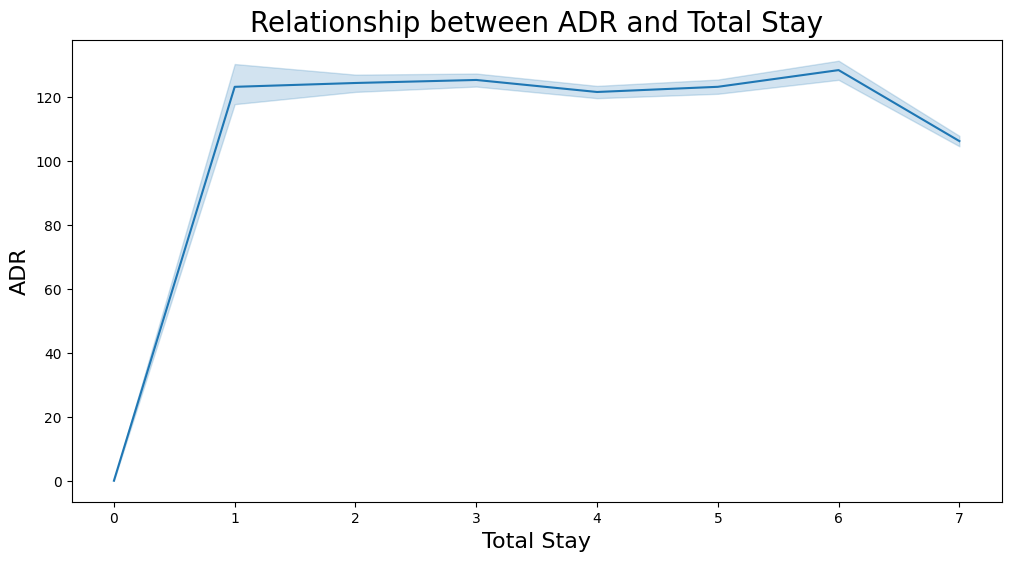

In [58]:
# Plotting the graph in line chart
# Set plot size
plt.figure(figsize=(12,6))

# Create the figure object
sns.lineplot(x= 'total_stay', y= 'adr', data= adr_vs_total_stay)

# Set labels
plt.xlabel('Total Stay', fontsize = 16)
plt.ylabel('ADR', fontsize = 16)
plt.title('Relationship between ADR and Total Stay', fontsize = 20)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

This is a line chart and it helps to show small shifts that may be getting hard to spot in other graphs. It helps show trends for different periods. They are easy to understand. So, here we can easily track the ups and downs of the graph very precisely.

##### 2. What is/are the insight(s) found from the chart?

From this line chart, we have found that as the total stay increases the ADR is also getting high. So, ADR is directly proportional to total stay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The hotels should focus on increasing their ADR and the more advertisement and better facilities and good offers will let the guests to stay more, that will directly result in increasing ADR. So, Hotels should offer more attractive offers and facilities, so that total stay can be increased that will directly multiply their ADR and ultimately revenue will increase.

#### Chart - 4 - Percentage of repeated guests (Univariate)

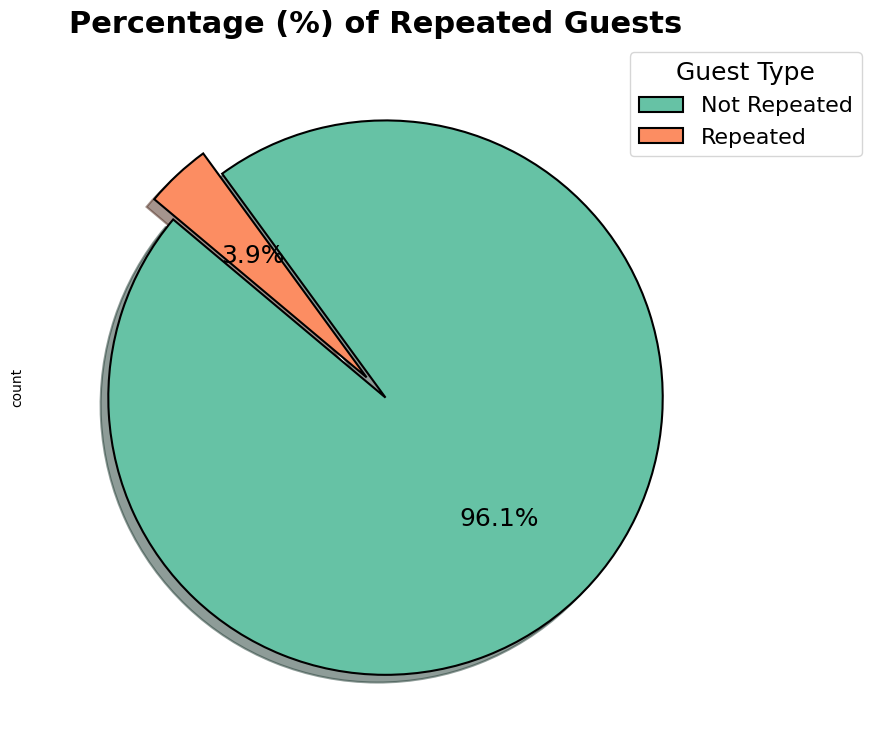

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing by pie chart
plt.figure(figsize=(10, 9))

# Create the pie chart with better styling
df['is_repeated_guest'].value_counts().plot.pie(
    explode=[0.05, 0.05],  # Slightly explode each slice for better visibility
    autopct='%1.1f%%',      # Display percentage on the pie slices
    shadow=True,            # Add a shadow effect
    startangle=140,         # Start angle for better visual balance
    colors=sns.color_palette("Set2", n_colors=2),  # Using Set2 color palette for a clean look
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Black border around each slice
    fontsize=18,            # Set font size for percentages
    labels=None             # Do not display labels on the pie slices
)

# Set title with custom font size and bold text
plt.title('Percentage (%) of Repeated Guests', fontsize=22, fontweight='bold', family='Arial')

# Add the legend with custom position and font size
labels = ['Not Repeated', 'Repeated']  # The two categories for 'is_repeated_guest'
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=16, title="Guest Type", title_fontsize=18)

# To show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are used to represent the data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie. Thus, i have used to show the percentage of repeated guests or not (where 0 is not repeated guest and 1 is repeated guest) through pie chart with different colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

Repeated guests are very few which is only 3.9% while 96.1% guests are not returning to the same hotel. So, it's a matter of deep thinking and taking proper steps to increase the repeated guests numbers for both type of hotels. In order to retained the guests management should take feedbacks from guests and try to improve the services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the proportion of repeated guests is very much low, so if the Hotels work well in this side also, then the increase in number of repeated guests will ultimately boost their revenue. So Hotels can give alluring offers to non-repetitive customers during off seasons to enhance revenue. So, right steps should be taken like taking feedbacks, solving problems of customers within time limit and offering best offers to the customers.

#### Chart - 5 - Percentage distribution of required car parking spaces (Univariate)

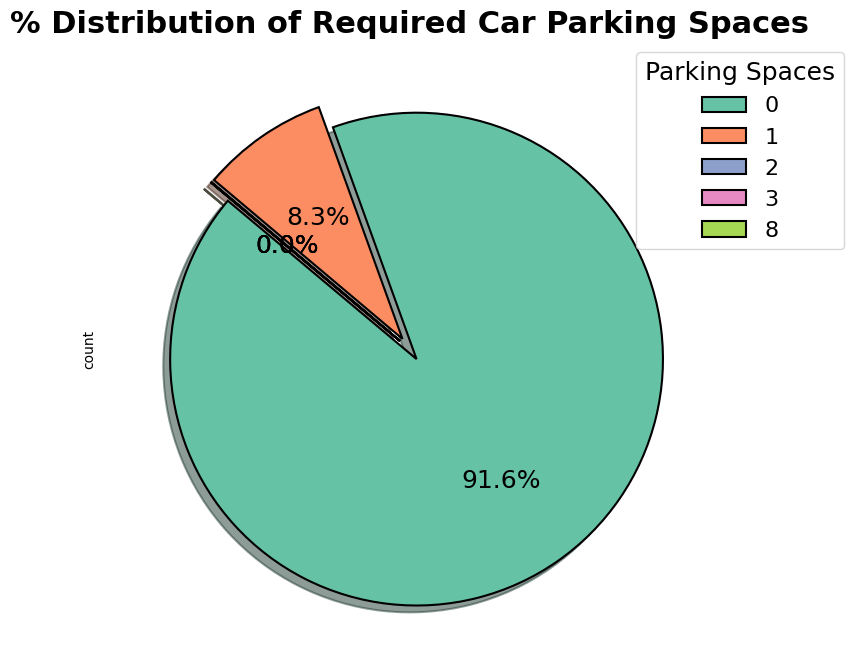

In [60]:

# Visualizing by pie chart
plt.figure(figsize=(12, 8))

# Create the pie chart with better styling
df['required_car_parking_spaces'].value_counts().plot.pie(
    explode=[0.05] * 5,  # Slightly explode each slice for better visibility
    autopct='%1.1f%%',     # Display percentage on the pie slices
    shadow=True,           # Add a shadow effect
    startangle=140,        # Start angle for better visual balance
    colors=sns.color_palette("Set2", n_colors=5),  # Using a Set2 palette for colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Black border around each slice
    fontsize=18,           # Set font size for percentages
    labels=None            # Do not display labels on the pie slices
)

# Create the figure object for the labels
labels = df['required_car_parking_spaces'].value_counts().index

# Set title with custom font size and bold text
plt.title('% Distribution of Required Car Parking Spaces', fontsize=22, fontweight='bold', family='Arial')

# Add the legend with custom position and font size
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=16, title="Parking Spaces", title_fontsize=18)

# To show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I have used pie chart here because it gives the output in a more understanding manner as here we can clearly see the different two colors reflecting the demand of car parking spaces by guests. So, it's a very useful chart to get proper insights as we can use other charts also but i have found it more relevent here.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that 91.6% guests did not required the parking space. Only 8.3% guests required the parking space.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from here definitely help the hotels to provide better services. It can be said that hotels need to work less on car parking spaces as only 1 car parking space was required by 8.3% of guests. SO, it's better to focus on other areas to increase quality of hotel rather than focusing mainly on car parking area only. The demand for car parking area is less. This might be due to the reason as many guests prefers to use public vehicles for travel.

#### Chart - 6 - Meal type Distribution (Univariate)

<ipython-input-61-aabd3a1247fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meal', data=df, palette="Set2", edgecolor='black', linewidth=1.5)


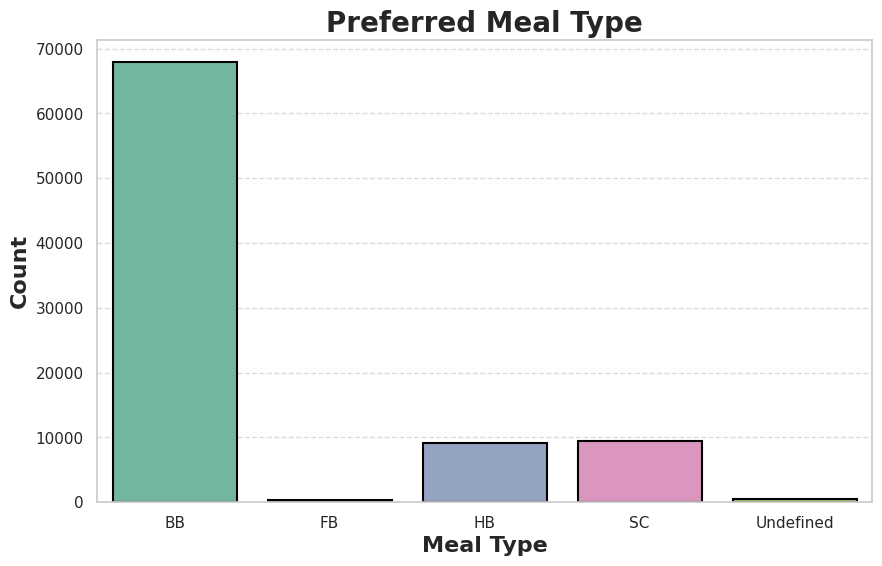

In [61]:

# Set the style for the plot
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(10, 6))

# Create the countplot with custom colors and a more polished look
sns.countplot(x='meal', data=df, palette="Set2", edgecolor='black', linewidth=1.5)

# Set labels with a bigger font size and custom font style
plt.xlabel('Meal Type', fontsize=16, fontweight='bold', family='Arial')
plt.ylabel('Count', fontsize=16, fontweight='bold', family='Arial')
plt.title('Preferred Meal Type', fontsize=20, fontweight='bold', family='Arial')

# Add a grid to make the plot look cleaner
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I have used the count plot here, because it shows the counts of observations in each categorical bin using bars. Bar plots look similar to count plots. But instead of the count of observations in each category, they show the mean of a quantitative variable among observations in each category. So, to get clear insights about the counts of different types of meal, i have used this count plot.

##### 2. What is/are the insight(s) found from the chart?

The insights that i have found from the above graph is that the most preferred meal type by the guests is BB (Bed and Breakfast) while HB (Half Board) and SC (Self Catering) are equally preferred. Types of meal in hotels are as follows:-

*   BB - (Bed and Breakfast)

*   HB - (Half Board)

*   FB - (Full Board)

*   SC - (Self Catering)





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So, the insights here also have positive impact as hotels need to focus more on the BB meal type so that the majority of customers are satisfied while others types of meals should be given equal importance with proper management of food services so as to offer best services to customers.

In [62]:
df.shape[0]

87230

#### Chart - 7 - Pie Chart for Mostly used Distribution channel and Bar plot for Relationship of Distribution channel and ADR

In [64]:
# Creating labels and distribution channel data
labels = df['distribution_channel'].value_counts().index.tolist()

# Creating new dataframe of distribution channel
distribution_channel_df = df['distribution_channel'].value_counts().reset_index().rename(
    columns={'index': "distribution_channel", 'distribution_channel': 'count'}
)


In [65]:
distribution_channel_df.iloc[:,1:2]* 100/df.shape[0]


count
0  79.133326
1  14.850396
2   5.803049
3   0.207497
4   0.005732

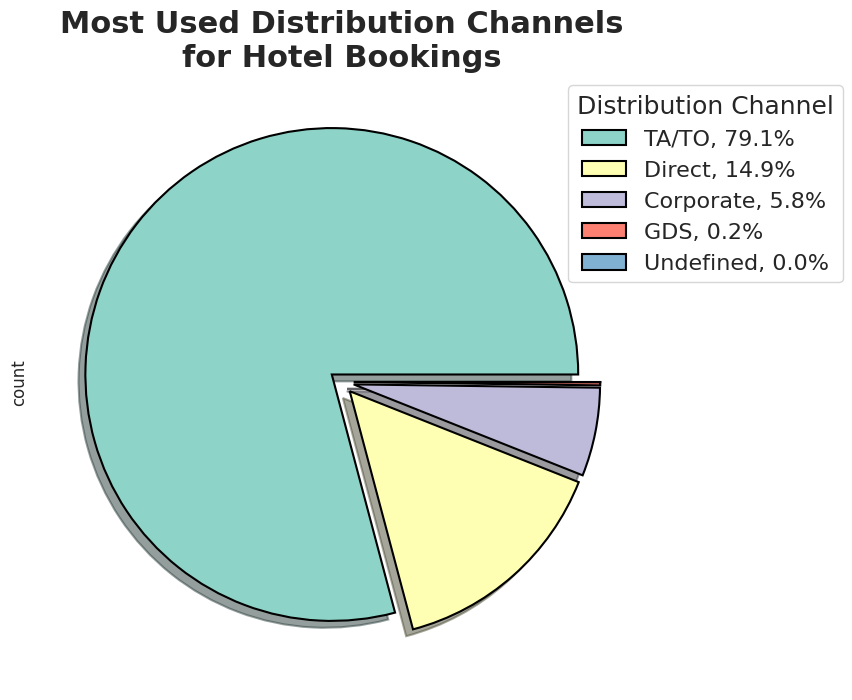

In [66]:

# Adding percentage column to the distribution_channel_df
distribution_channel_df['percentage'] = round(distribution_channel_df.iloc[:,1:2] * 100/df.shape[0], 1)

# Creating list of percentages
sizes = distribution_channel_df['percentage'].values.tolist()

# Plotting the pie chart with improved styling
plt.figure(figsize=(12, 8))
df['distribution_channel'].value_counts().plot.pie(
    explode=[0.05] * len(labels),  # Slight explosion for better clarity
    shadow=True,                    # Shadow effect for a 3D look
    figsize=(12, 8),                # Size of the pie chart
    fontsize=14,                    # Font size for the percentages
    labels=None,                    # Don't display labels directly on the chart
    colors=sns.color_palette("Set3", n_colors=len(labels)),  # Use a Seaborn palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Black border around slices
)

# Formatting labels with percentages and distribution channel names
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]

# Adding the legend with custom labels
plt.legend(
    bbox_to_anchor=(0.85, 1),
    loc='upper left',
    labels=labels,
    fontsize=16,
    title="Distribution Channel",
    title_fontsize=18
)

# Adding the title with custom font size and styling
plt.title('Most Used Distribution Channels\nfor Hotel Bookings', fontsize=22, fontweight='bold', family='Arial')

# To show the plot
plt.show()


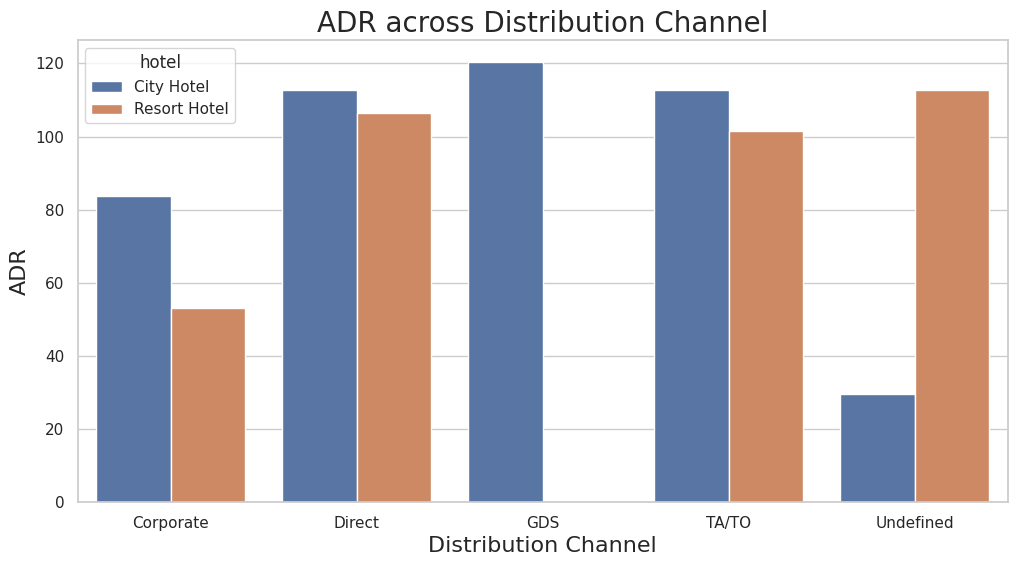

In [67]:
# Visualizing with the help of bar plot for checking relationship between ADR and distribution channel
# Using group by on distribution channel and hotel
distribution_channel_df = df.groupby(['distribution_channel', 'hotel'])['adr'].mean().reset_index()

# Set plot size
plt.figure(figsize = (12,6))

# Plotting the bar chart
sns.barplot(x = 'distribution_channel', y = 'adr', data = distribution_channel_df, hue = 'hotel')

# Set labels
plt.xlabel("Distribution Channel", fontsize = 16)
plt.ylabel("ADR", fontsize = 16)
plt.title('ADR across Distribution Channel', fontsize = 20)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

In the first visualization here i have used the pie chart to get clear understanding of mostly used booking distribution channel with occupancy percentage of each booking channel. A pie chart expresses a part-to-whole relationship in the data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie chart and which helped me to get the percentage comparison of the dependent variable.

While in 2nd visualization, Bar charts are used. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages. To show the mean of ADR with respect to the type of distribution channel, i have used Bar chart. So, this graph will help us to know about various distribution channel and their contribution to ADR in order to increase the income and revenue.

##### 2. What is/are the insight(s) found from the chart?

From the above 1st chart, i have found that 'TA/TO' has been mostly (79.1%) used for booking hotels. Direct market segment of 14.9%, Corporates market segment of 5.8%, GDS market segment of only 0.2% and rest unidentified are 0%

From the above 2nd chart it is clear that 'Direct' and 'TA/TO' have almost equally contribution in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'. While, GDS has highly contributed in ADR in 'City Hotel' type. GDS needs to increase Resort Hotel bookings. Corporate - These are corporate hotel booking companies which makes bookings possible. The definitions of abbreviations used in this graph are as follows:-

*   GDS- A GDS is a worldwide contact between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

*   Direct- means that bookings are directly made with the respective hotels.

*   TA/TO- means that bookings are made through travel agents and travel operators.

*   Undefined- Bookings are undefined. It may be the reason that customers made their bookings on arrival.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So, from the 1st graph, we have got the insights that 'TA/TO' is the leading one while Direct and Corporates have the potential to grow as they occupy much less space than the leading one. So, a good understanding and relation of Hotels with 'TA/TO' will definitely add up to the growth and revenue.

Yes, the gained insights from 2nd visualization will definitely help different distribution channels to work on the spaces where they are lacking behind like GDS is lacking behind in the bookings of Resort hotel. GDS is dominating in terms of ADR in case of City hotels but lacking behind in the category of Resort hotel. So, just taking proper steps in the right direction will help to increase the overall revenue.

#### Chart - 8 - Bookings by Month and Optimal Stay Length in Hotels

In [68]:
# Chart - 8 visualization code

# Using groupby on arrival_date_month and taking the hotel count
bookings_by_months_df = df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns = {'hotel':'Counts'})

# Creating list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating dataframe which will map the order of above months list without changing its values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting by arrival_date_month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

arrival_date_month  Counts
4             January    4685
3            February    6083
7               March    7489
0               April    7900
8                 May    8344
6                June    7756
5                July   10043
1              August   11242
11          September    6682
10            October    6921
9            November    4973
2            December    5112

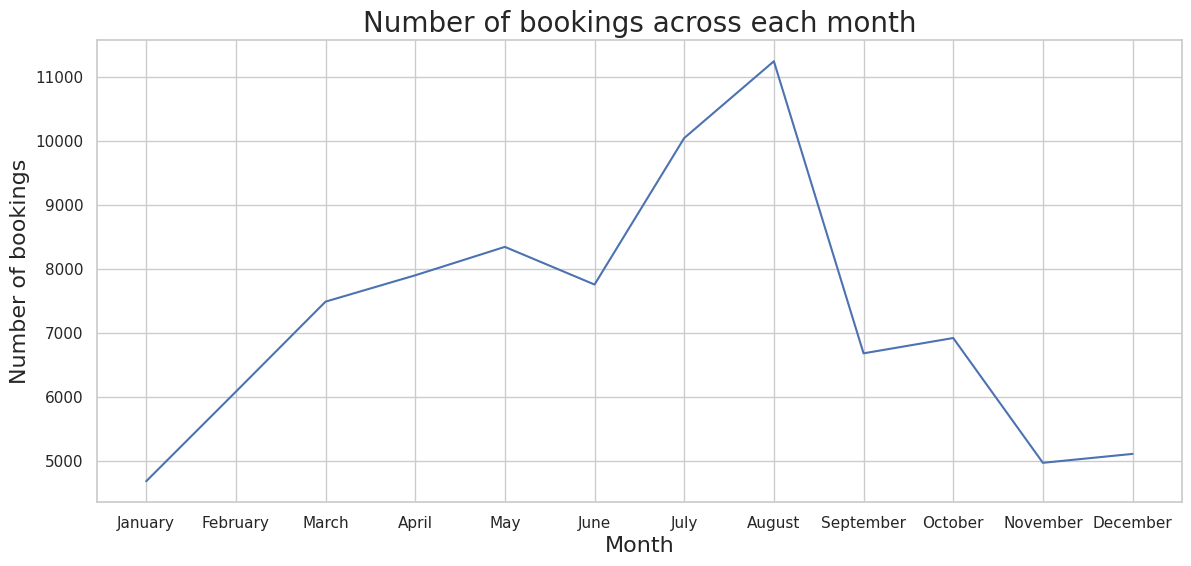

In [69]:
# Visualizing with the help of line plot

# Set plot size
plt.figure(figsize = (14,6))

# Plotting lineplot on x- months & y- bookings counts
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['Counts'])

# Set title
plt.title('Number of bookings across each month', fontsize = 20)

# Set labels
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of bookings', fontsize = 16)

# To show
plt.show()

In [70]:
# Visualizing with the help of bar plot

# Using groupby function on total stay and hotel
stay = df.groupby(['total_stay', 'hotel']).agg('count').reset_index()

# Taking only first three columns
stay = stay.iloc[:, :3]

# Renaming the columns
stay = stay.rename(columns = {'is_canceled':'Number of stays'})

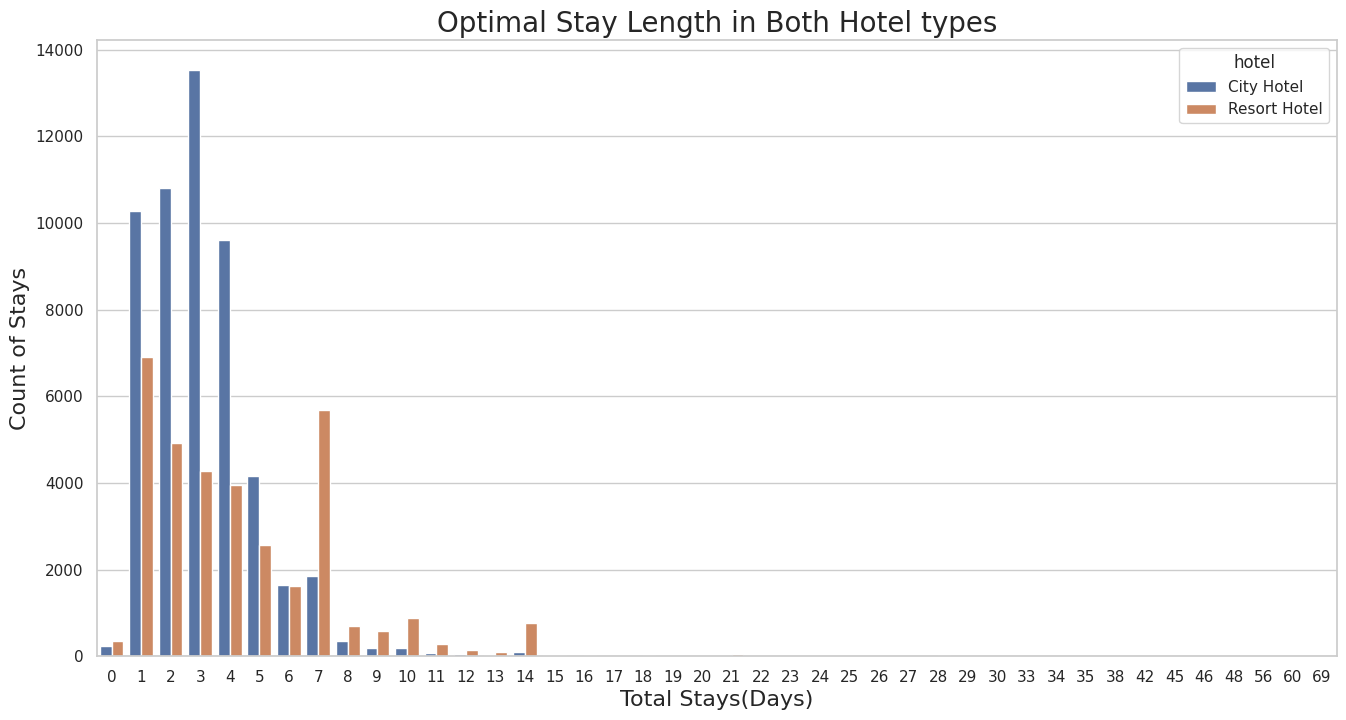

In [71]:
# Set plot size
plt.figure(figsize = (16,8))

# Plotting barchart
sns.barplot(x = 'total_stay', y = 'Number of stays', hue = 'hotel', data = stay)

# Set labels
plt.title('Optimal Stay Length in Both Hotel types', fontsize = 20)
plt.ylabel('Count of Stays', fontsize = 16)
plt.xlabel('Total Stays(Days)', fontsize = 16)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

For 1st chart, i have picked the line chart here because it helps to show small shifts that may be getting hard to spot in other graphs. It helps show trends for different periods. They are easy to understand. So, here we can easily track the change of 'number of bookings' with respect to month.

While in 2nd chart here, bar plot has been used. I have used this chart to get clear view in understanding the relation between total stay in terms of days and count of stays(means total number of customers stayed)

##### 2. What is/are the insight(s) found from the chart?

From this graph of 1st chart, i have found that July and August months had the most Bookings. As, July and August generally surrounds in and near the summer vacation. So, summer vacation can be the reason for the bookings.

While, 2nd chart gives us different insights. So, from the above observations, we have found that the Optimal stay in both the type hotel is less than 7 days. So, after that staying numbers have declined drastically.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes from the 1st chart, it is clear that this provides a good insights that hotels should be well prepared for the month of July and August as maximum bookings takes place for this month. So, better the preparation and good approach will definitely adds to the growth of Hotels.

While in 2nd chart also have positive impact. Yes, from the insights gathered here, hotels can work in the domain to increase the staying length of customers to increase their revenue. The other understanding is that customers usually prefers a one week stay in a hotel. So, hotels need to work efficiently in these seven days so that customers would return to the same hotel again so this will increase the revenue.

#### Chart - 9 - Plotting Histogram

In [72]:
# Chart - 9 visualization code
# Visualizing with the help of histogram plot for the entire dataset
# Set the plot size


##### 1. Why did you pick the specific chart?

To understand the data in a clear way with proper insights. I have used the histogram here. The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on a interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data. Thus, i have used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

Some insights found from the chart are as follows:-

*   We can see that the maximum guest came in the year 2016.

*   Maximum arrival week number is 30.

*   Maximum arrival happens in the last of the month.

*   Maximum guests comes with no children.

*   There is very less requirement of Car parking spaces.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 10 - Year and Hotel wise confirmed bookings and cancellation distribution

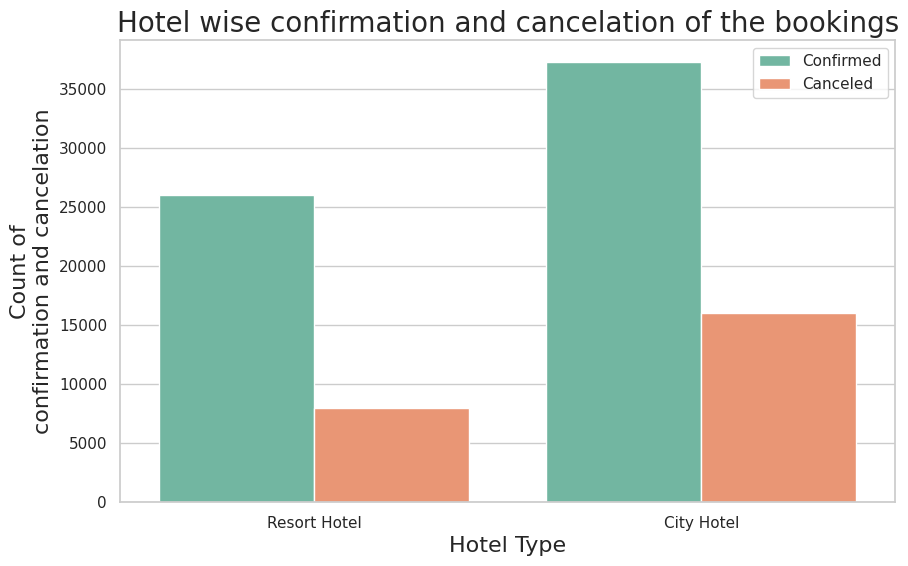

In [73]:
# Chart - 10 visualization code

# Finding out the percentage and counts of confirmed and canceled bookings
# Plotting a Count Plot chart using seaborn for counts of confirmed and canceled bookings

# Set plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.countplot(x = 'hotel', hue = 'is_canceled', palette = 'Set2', data = df)

# Set legends
plt.legend(['Confirmed', 'Canceled'])

# Set labels
plt.title('Hotel wise confirmation and cancelation of the bookings', fontsize = 20)
plt.ylabel('Count of\nconfirmation and cancelation', fontsize = 16)
plt.xlabel('Hotel Type', fontsize = 16)

# To show
plt.show()

is_canceled
0    25982
1     7974
Name: count, dtype: int64

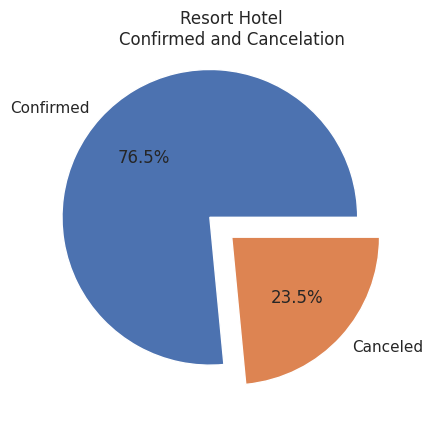

In [74]:
# Plotting a Pie chart using matplotlib for percentage of confirmed and canceled bookings of Resort Hotel
resort_hotel = df.loc[(df['hotel'] == 'Resort Hotel')]
resort_hotel_checking_cancel = resort_hotel['is_canceled'].value_counts()

# Set labels
mylabels = ['Confirmed', 'Canceled']

# Set figure size
myexplode = [0.2, 0]

# Create the figure object
resort_hotel_cancelation = plt.pie(resort_hotel_checking_cancel, labels = mylabels, explode = myexplode, autopct = '%1.1f%%')

# Set title
plt.title('Resort Hotel\nConfirmed and Cancelation')

resort_hotel_checking_cancel

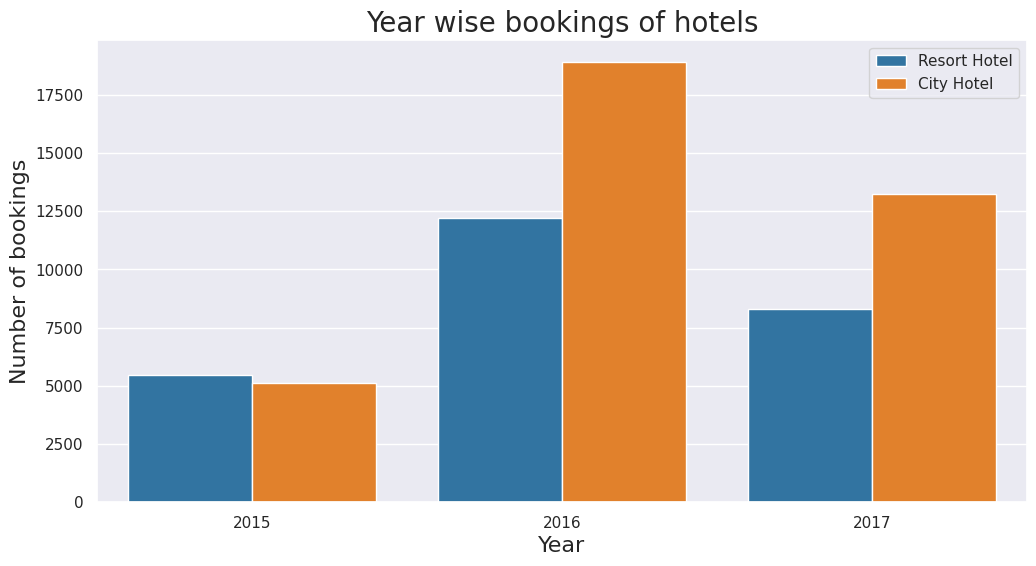

In [75]:
# Removing the canceled bookings from the data and creating a new dataframe
data_not_canceled = df[df['is_canceled'] == 0]

# Year wise Bookings of hotels
# Set style
sns.set_style(style = 'darkgrid')

# Set plot size
plt.figure(figsize = (12,6))

# Create the figure object
sns.countplot(x= 'arrival_date_year', hue= 'hotel', palette = 'tab10', data = data_not_canceled)

# Set legends
plt.legend(['Resort Hotel', 'City Hotel'])

# Set labels
plt.title('Year wise bookings of hotels', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 16)
plt.xlabel('Year', fontsize = 16)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

I have picked out the count plot and pie plot lot to get proper insights on Hotel wise cancelation and confirmation of bookings.

##### 2. What is/are the insight(s) found from the chart?

We can clearly deduce from the above graphs that the City hotel is having greater number of bookings as compared to Resort hotel. But, the cancelation percentage is high of the City Hotel.

From the above graphs, it can be summarised that in the year 2016 both the hotel saw a massive increase in their bookings and by far the year 2016 is the year of the highest bookings of both hotel. In 2016 and 2017 the City hotel is having the highest number of bookings but in 2015 the Resort hotel is having the highest number of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Overall the graphs show a positive outcome but the visualization of cancelation graph creates a situation of deep concern. So, here as we can see, that more than 1/4th of overall booking got canceled.  So, it's a matter of deep concern. Thus, we need to look over this problem. The solution to this problem is that, we can check the reasons of cancelation of a booking & need to get this sorted out as soon as possible at the business level to stop the problems getting broader.

#### Chart - 11 - ADR across different months

In [76]:
# Chart - 11 visualization code

# Using groupby funtion
bookings_by_months_df = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting values
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

arrival_date_month         hotel         adr
8             January    City Hotel   85.269875
9             January  Resort Hotel   49.181693
6            February    City Hotel   89.266427
7            February  Resort Hotel   54.102809
15              March  Resort Hotel   57.590889
14              March    City Hotel   95.193911
0               April    City Hotel  117.314134
1               April  Resort Hotel   79.283805
17                May  Resort Hotel   80.551101
16                May    City Hotel  128.055724
13               June  Resort Hotel  112.380859
12               June    City Hotel  123.996416
11               July  Resort Hotel  156.166914
10               July    City Hotel  120.318314
3              August  Resort Hotel  187.566659
2              August    City Hotel  125.148662
22          September    City Hotel  118.764693
23          September  Resort Hotel  100.892331
20            October    City Hotel  107.585401
21            October  Resort Hotel   63.723065
18           November    City Hotel   89.882912
19           November  Resort Hotel   48.871043
5            December  Resort Hotel   65.488671
4            December    City Hotel   93.204767

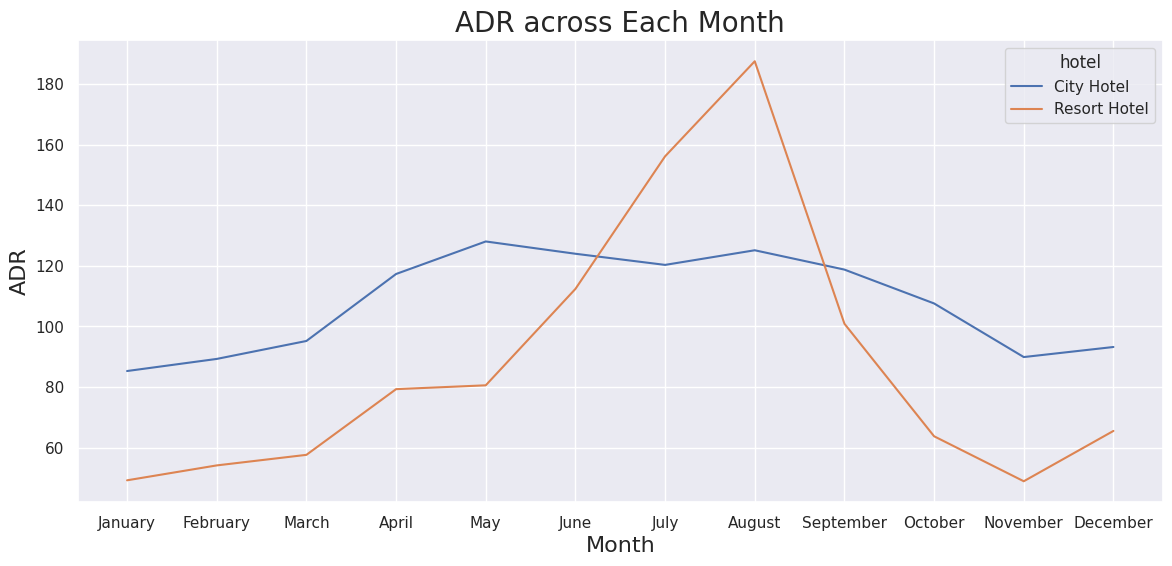

In [77]:
# Visualizing with the help of line plot

# Set plot size
plt.figure(figsize = (14,6))

# Create the figure object and plotting the line
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['adr'], hue = bookings_by_months_df['hotel'])

# Set labels
plt.title('ADR across Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('ADR', fontsize = 16)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

I have picked the line chart here to get the clear insights of ADR by City and Resort hotels across each month. Line chart is very useful because it helps to show small shifts that may be getting hard to spot in other graphs. It helps show trends for different periods. They are easy to understand. To compare data, more than one line can be plotted on the same axis.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are as follows:-

*   For Resort Hotel, ADR is high in the months of June, July, August as compared to City Hotels. The reason may be that customers/people want to spent their summer vacation in Resort Hotels.

*   The best time for guests to visit Resort or City Hotels is January, February, March, April, October, November and December as the average daily rate in this month is very low. So, it would be feasible and sustainable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So, the higher the ADR, the higher will be the revenue, so its a good sign. Hotels should work more to enhance their ADR by offering good schemes to attract customers in winter vacation also and other holidays.

#### Chart - 12 - Weekly stay distribution and Calculation of Cancelation and non-cancelation

<ipython-input-78-94441016b4e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
<ipython-input-78-94441016b4e2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'arrival_date_week_number', y = 'total_stay', palette = 'Set2', data = df)


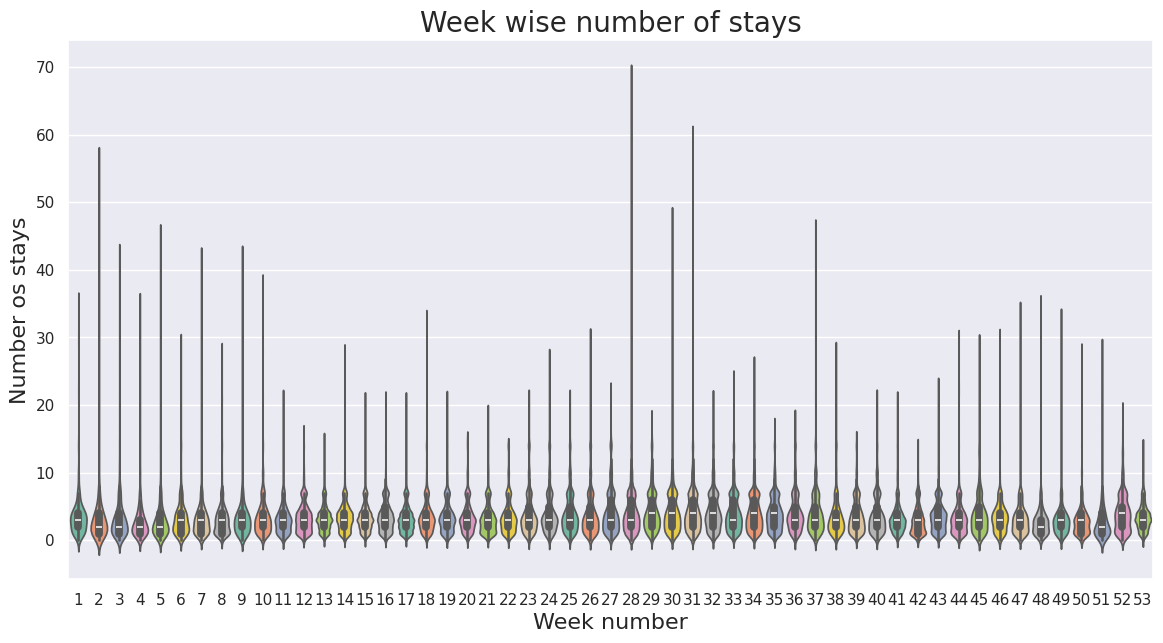

In [78]:
# Chart - 12 visualization code
# As i have already created a column 'total_stay' above i.e.
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Set the plot size
plt.figure(figsize=(14,7))

# Using a violin plot to know in which weeks, visitors stays the most
sns.violinplot(x = 'arrival_date_week_number', y = 'total_stay', palette = 'Set2', data = df)

# Set labels
plt.title('Week wise number of stays', fontsize = 20)
plt.ylabel('Number os stays', fontsize = 16)
plt.xlabel('Week number', fontsize = 16)

# To show
plt.show()

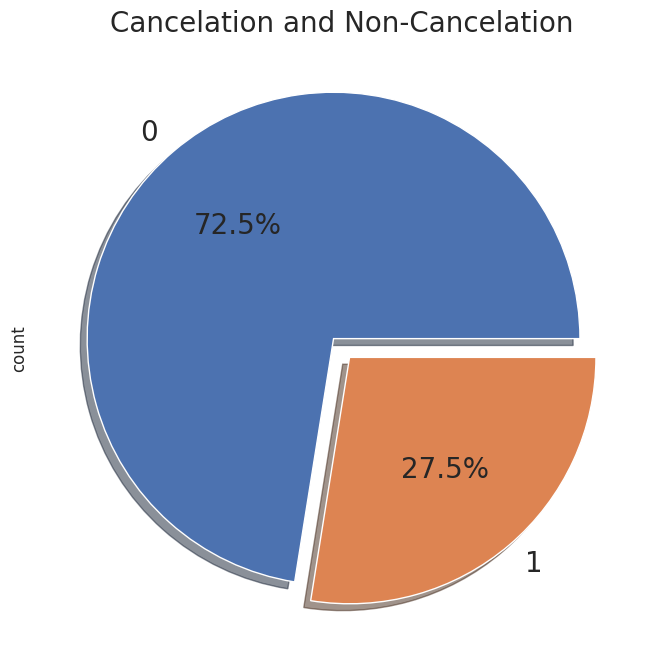

In [79]:
# Visualizing with the help of pie plot
df['is_canceled'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%', shadow = True, figsize = (10,8), fontsize = 20)

# Set title
plt.title('Cancelation and Non-Cancelation', fontsize = 20)

# To show
plt.show()

##### 1. Why did you pick the specific chart?

I have used the violin plot here, to gather proper relation between number of stays and week wise number of stays and violin plots are used when one want to observe the distribution of numetic data, and are especially useful when you want to make a comparison of distributions between multiple groups. This peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

I have picked this pie plot as it's look very precise and clear to get the insights between two variables. As, we can see now 27.5% tickets was canceled. Here, 0 denotes not canceled and 1 denotes the canceled one. So, i have used the pie plot because it represents data visually as a fractional part of a whole, which can be an effective communication tool for the even uninformed audience. It enables the audience to see a data comparison at a glance to make an immediate analysis or to understand information quickly.

##### 2. What is/are the insight(s) found from the chart?

From the above violin plot, we have found that from the week 28 to 31, it has shown the highest days of stay whereas from the week 1 to 11 has shown a very steady trend in the number of stays and also the week 18 to 22 has shown the least number of stays by the visitors in aggregate of all 3 years 2015, 2016 and 2017.

From the graph, we have found the insights that more than 1/4th of the overall bookings i.e. approx 27.5% of the tickets was got canceled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, according to the outcomes, Client can have a better plan to provide better services to the guests so that the revenue can be multiplied.

So, here as we can see, that more than 27% booking got canceled. So, it's a matter of deep concern. Thus, we need to look over this problem. The solution to this problem is that, we can check the reasons of cancelation of a booking & need to get this sorted out as soon as possible at the business level to stop the problems getting broader.

#### Chart - 13 - Room type preference and Customer types

<ipython-input-80-526a4506a839>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


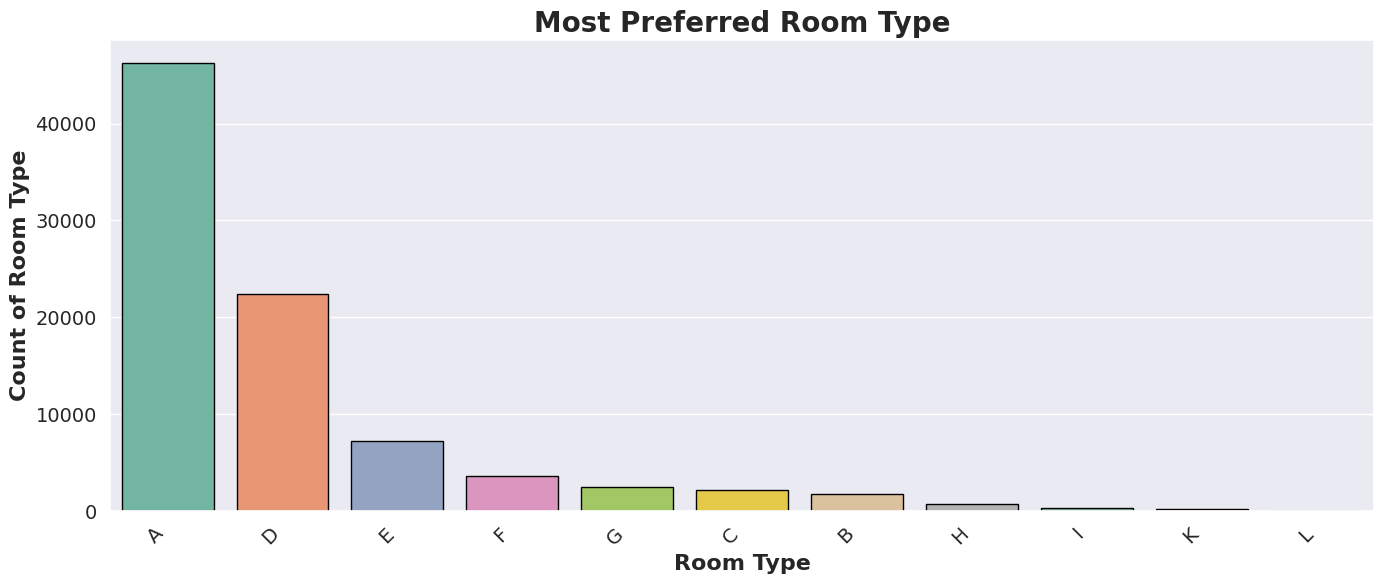

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(14, 6))

# Create the countplot with improved styling
sns.countplot(
    x='assigned_room_type',  # Column to count and plot
    data=df,  # Specify the DataFrame
    order=df['assigned_room_type'].value_counts().index,  # Order the room types by frequency
    palette="Set2",  # Using a color palette for distinct colors
    edgecolor='black'  # Add black edges for better clarity
)

# Set labels and title with custom font size and weight
plt.xlabel('Room Type', fontsize=16, fontweight='bold')
plt.ylabel('Count of Room Type', fontsize=16, fontweight='bold')
plt.title('Most Preferred Room Type', fontsize=20, fontweight='bold')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right', fontsize=14)

# Adjusting the y-axis tick labels for clarity
plt.yticks(fontsize=14)

# To show the plot
plt.tight_layout()  # Ensures no clipping of labels
plt.show()


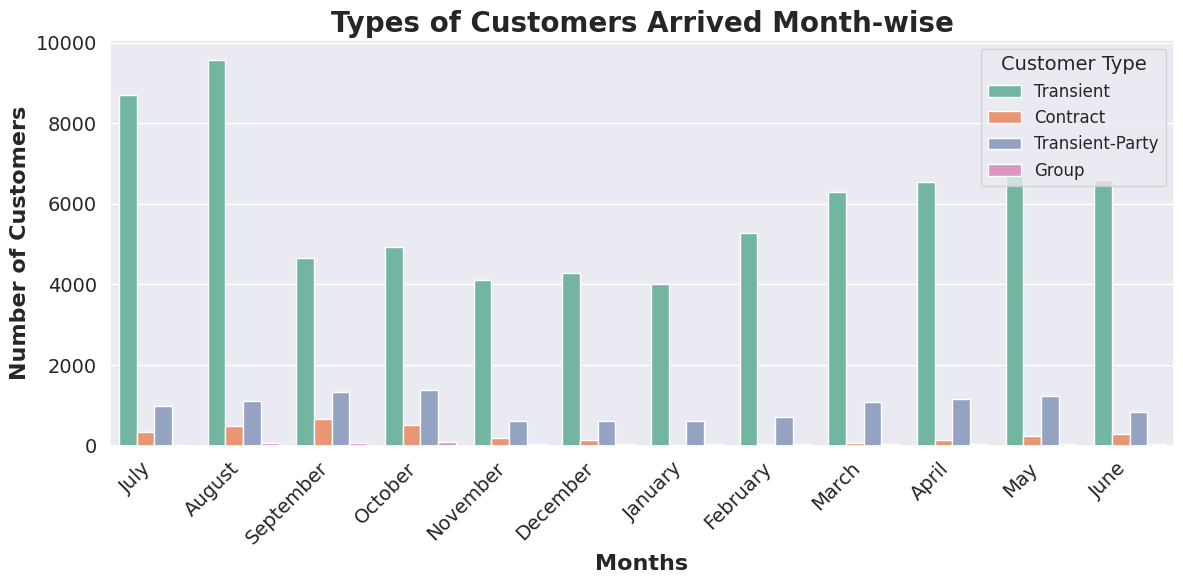

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the countplot with customer type as hue and month on the x-axis
sns.countplot(
    x='arrival_date_month',          # Month on x-axis
    hue='customer_type',             # Differentiate by customer type
    palette='Set2',                  # Using a Seaborn color palette
    data=df                         # DataFrame containing the data
)

# Set labels with appropriate font size
plt.xlabel('Months', fontsize=16, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=16, fontweight='bold')
plt.title('Types of Customers Arrived Month-wise', fontsize=20, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Adjust y-axis labels for better clarity
plt.yticks(fontsize=14)

# Add a legend for the customer types (automatically added by seaborn)
plt.legend(title='Customer Type', title_fontsize=14, fontsize=12, loc='upper right')

# Tight layout to ensure nothing is clipped
plt.tight_layout()

# To show the plot
plt.show()


##### 1. Why did you pick the specific chart?

For 1st visualization, i have picked the bar chart to display result for this set of code. Here, i have used bar graph to show distribution by volume(count of room), which type of room is alotted. Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. So, i have used the bar graph here.

While 2nd visualization involves a count plot because it helps us to get clear insights with the total number of guests visited. So, i have used count plot here to know about the type of guests.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is found that the most preferred Room type is 'A'. So, majority of the guests have shown interest in this room type. So, overall this chart shows room type 'A' is most preferred by guests.

From the 2nd graph, it can be summarised that the Transient type of customers visit the most whereas the visitors who are in group comes in the category of least visitors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the graph it can be seen that there are positive impacts because 'A', 'D', 'E' is more preferred by guest due to better services offered in room type. So, overall booking in a hotel matters. So, each room type belongs to each hotel so wherever customers goes, the hotel will be benefit but Hotels should also look in the factors affecting less preference in some particular room type. So, overall if other room types will also gain popularity then again hotel will be benefitted. So, ultimately hotels will encounters more bookings resulting in much more revenues.

Ofcourse the better understanding regarding the different type of guests will help to take proper right steps towards services, facilities, requirements and offers which will directly result in the growth in business.

In [82]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.184515           0.088020   
lead_time                          0.184515   1.000000           0.139408   
arrival_date_year                  0.088020   0.139408           1.000000   
arrival_date_week_number           0.001691   0.101295          -0.513895   
arrival_date_day_of_month          0.005449   0.009899          -0.009872   
stays_in_weekend_nights            0.060992   0.236316           0.005277   
stays_in_week_nights               0.084159   0.312506           0.003765   
adults                             0.080271   0.139033           0.038744   
children                           0.067182   0.028395           0.041178   
babies                            -0.020627  -0.003705          -0.023366   
is_repeated_guest                 -0.088764  -0.145777           0.024678   
previous_cancellations             0.051501   0.005370          -0.054284   

#### Chart - 14 - Correlation Heatmap

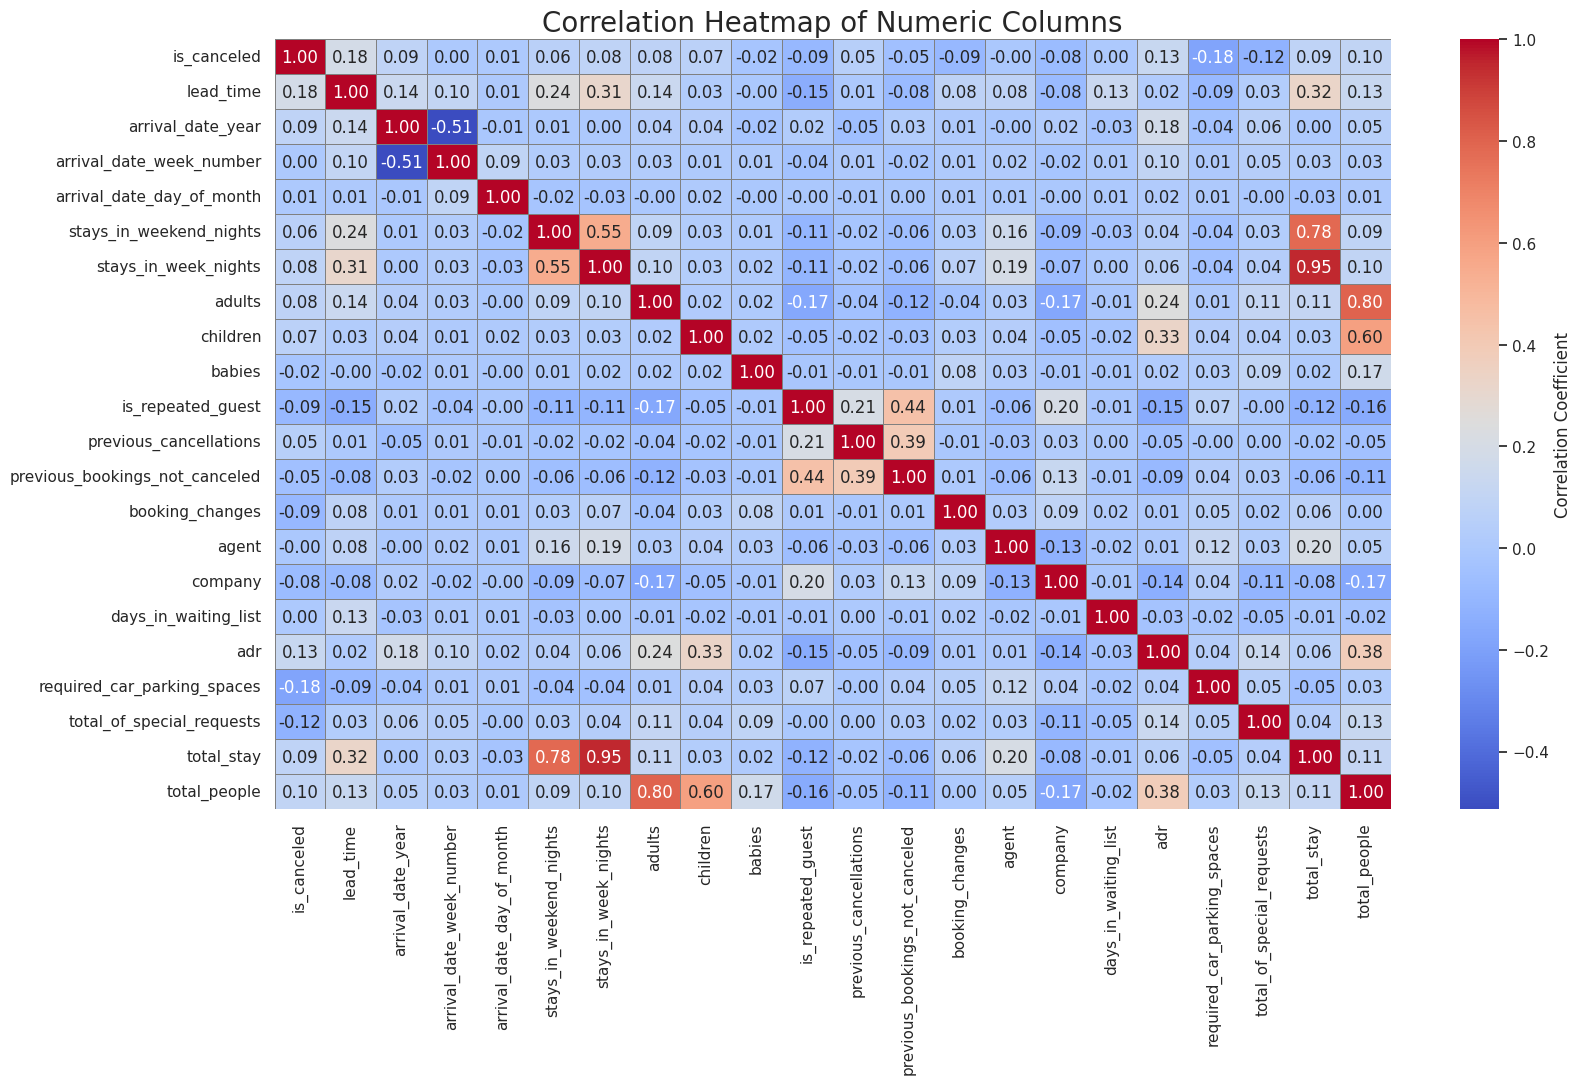

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix (assuming you have already done this)
# For example, if you are using the numeric columns:
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# Set the plot size
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix,   # Pass the correlation matrix
    annot=True,            # Annotate with correlation values
    fmt='.2f',             # Format the annotation to 2 decimal places
    cmap='coolwarm',       # Color map for better visibility
    linewidths=0.5,        # Line width between cells
    linecolor='gray',      # Color of the lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}  # Color bar label
)

# Set the title
plt.title('Correlation Heatmap of Numeric Columns', fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the co-relation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis and as a diagnostic for advanced analysis. The range of correlation is [-1,1].

Thus to know the co-relation between all the variables along with the correlation coefficients, i have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart are as follows:-

*   is_canceled and total_stay are negatively correlated. This means customers are unlikely to cancel their bookings if they don't get the same room as per reserved room. We have visualized it above.

*   lead_time and total_stay is positively correlated. This means more the stay of customer is, more will be the lead time.

*   adults, childrens and babies are correlated to each other. This indicates more the people, more will be ADR.

*   is_repeated guest and previous bookings not canceled have a strong correlation. This may be due to the reason that repeated guests are not more interested to cancel their bookings.

*   So, these are some powerful insights found from the chart of correlation heatmap.

#### Chart - 15 - Pair Plot

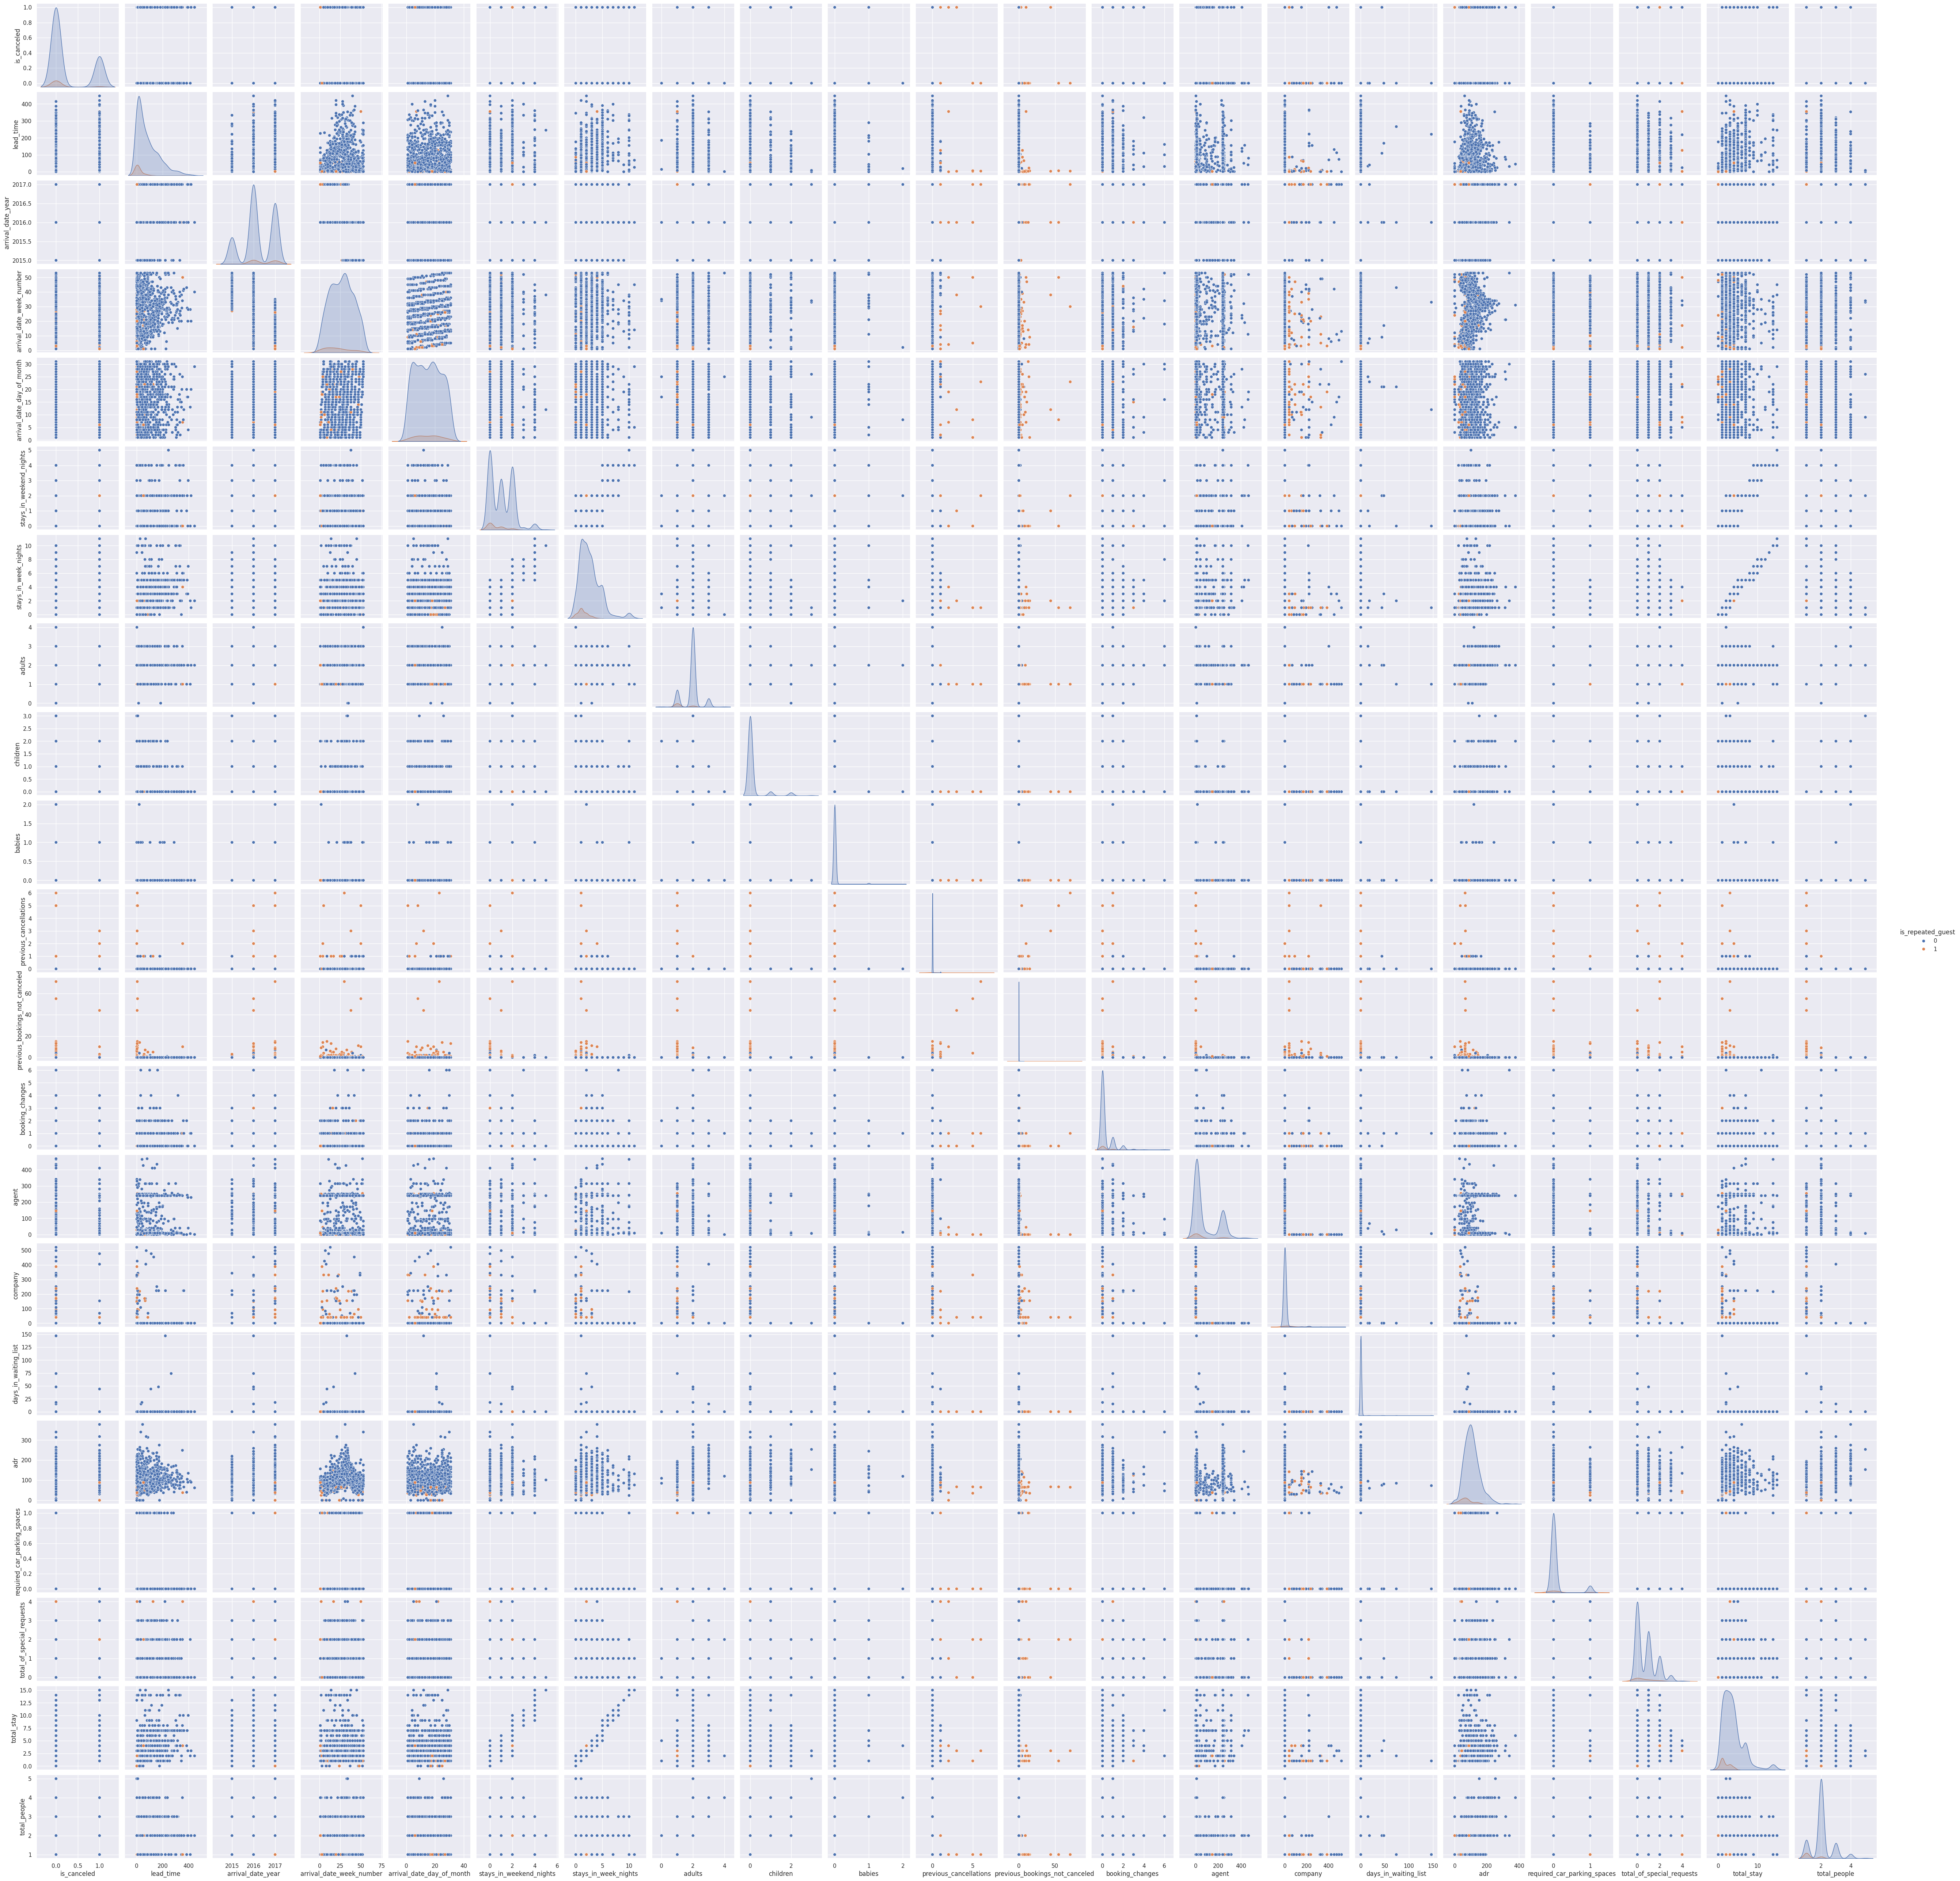

In [85]:
# Sample 1000 random rows for quicker plotting
sampled_df = df.sample(n=1000, random_state=42)

# Create the pairplot on the sampled data
sns.pairplot(sampled_df, hue='is_repeated_guest')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, i have used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here it shows the output in the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We have found the relationship of 'is_repeated_guest' with different types of columns. So, generally this chart reflects the relationship of a particular column with all other columns.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Business Objective Attained as Follows:**

1. **Growth and Success in Hotel Business**: To achieve high growth and success in the hotel industry, key factors such as **high revenue generation**, **customer satisfaction**, and **employee retention** need to be prioritized.

2. **Revenue Trends and Insights**: By analyzing various **charts** and **graphs**, we have successfully identified the **months with high revenue generation**, providing the client with clear insights into peak revenue periods.

3. **Enhancing Revenue through Room Preferences**: The use of **bar charts** has helped in visualizing which **room types** are most preferred and reserved, along with identifying the months that are best suited for visitor bookings, ultimately enhancing the revenue stream.

4. **Customer Preferences Analysis**: Insights into various preferences, such as the **most liked meal types**, **optimal stay lengths**, and **required customer facilities** (e.g., car parking spaces), have been uncovered. These insights are essential for better planning and growth.

5. **Proactive Planning for Client Satisfaction**: Armed with these insights, the client can be well-prepared in advance, ensuring a **smoother guest experience**, minimizing grievances, and promoting continuous improvement in hospitality services.

6. **Feedback for Continuous Improvement**: Regularly **asking for guest feedback** is crucial to continually upgrade the hotel's services and increase guest satisfaction, leading to a growing number of visitors.

7. **Attracting Repeat Guests**: Periodically offering **special promotions** to past customers will help increase the **number of repeat guests**, thereby boosting customer retention and fostering long-term business success.


# **Conclusion**

- **City Hotels Dominate Popularity**: City hotels are the most favored hotel type by guests, making them the busiest compared to resort hotels.

- **Higher Revenue from City Hotels**: The average ADR (Average Daily Rate) for city hotels surpasses that of resort hotels, indicating that city hotels generate more revenue overall.

- **Longer Stays Lead to Higher Revenue**: There is a direct correlation between the length of guest stays and ADR. Longer stays result in higher ADR and, consequently, greater revenue.

- **Low Retention Rate**: The percentage of repeat guests is minimal, with only 3.9% of visitors returning, while a significant 96.1% of guests are first-time visitors, pointing to a relatively low guest retention rate.

- **Car Parking Demand is Low**: The need for car parking spaces is not a major factor for guests, as 91.6% of customers do not require parking, indicating that the availability of parking spaces does not greatly influence business.

- **BB (Bed & Breakfast) Preferred Meal Option**: Among the different meal options, guests overwhelmingly prefer the 'Bed & Breakfast' (BB) package, making it the most popular meal choice.

- **Distribution Channel Contribution**: Both 'Direct' and 'TA/TO' (Travel Agents/Tour Operators) contribute equally to ADR across both city and resort hotels. However, the 'GDS' (Global Distribution System) has a significantly larger impact on ADR in city hotels.

- **Stay Duration Trends**: The optimal stay duration in both hotel types (City and Resort Hotels) tends to be under 7 days, with most guests staying for about a week. After this point, the average length of stay decreases sharply.

- **Peak Booking Periods**: The highest number of bookings are recorded during the summer months of July and August, suggesting these are the most popular times for guests to travel.

- **Dominance of 'TA/TO' as Booking Channel**: The primary distribution channel for bookings is through 'TA/TO', accounting for 79.1% of all reservations made, highlighting the influence of travel agents and tour operators in the booking process.

- **Seasonal ADR Trends**: When examining ADR by month, resort hotels experience higher ADRs during June, July, and August compared to city hotels, indicating that resort hotels perform better during the peak summer months.

- **Booking Cancellations**: Approximately 27.5% of all bookings are canceled, highlighting a significant cancellation rate in the booking process.

- **Room Type Preference**: Room type 'A' is the most popular among guests, making it the preferred room option for the majority of customers.
